## **Project Name:** Classification - Flipkart Customer Service Satisfaction



##### **Project Type**    - EDA & Classification
##### **Contribution**    - Individual

### **Project Summary -**
This project analyzes Flipkart’s customer interaction data to understand the key drivers of customer satisfaction (CSAT) and operational efficiency. The dataset contains detailed records of customer interactions across various channels (inbound, outcall, email), with information such as interaction category, sub-category, agent details, tenure, shift, and CSAT scores. The analysis aims to uncover patterns in customer feedback, identify opportunities for process improvement, and build a predictive model for customer satisfaction.

### **GitHub Link -**
https://github.com/gvdharun/Flipkart-Customer-Service-Satisfaction.git

### **Problem Statement -**
To enhance customer experience and optimize operations, Flipkart needs to identify the factors that influence customer satisfaction during interactions. The objective is to analyze interaction data, extract actionable insights, and develop a model that can predict CSAT scores based on the features of each interaction.

### ***Let's Begin !***

### ***1. Know Your Data***

### Import Libraries

In [112]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

### Dataset Loading

In [113]:
# Load Dataset
df = pd.read_csv("D:\Prog files\Labmatix Projects\Flipkart Project\Customer_support_data.csv")

### Dataset First View

In [114]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [115]:
# Dataset Rows & Columns count
print('Row: ', df.shape[0])
print('Columns: ', df.shape[1])

Row:  85907
Columns:  20


### Dataset Information

In [116]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Duplicate Values

In [117]:
# Dataset Duplicate Value Count
print('Duplicate values: ', df.duplicated().sum())

Duplicate values:  0


### Missing Values/Null Values

In [118]:
# Missing Values/Null Values Count
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
dtype: int64


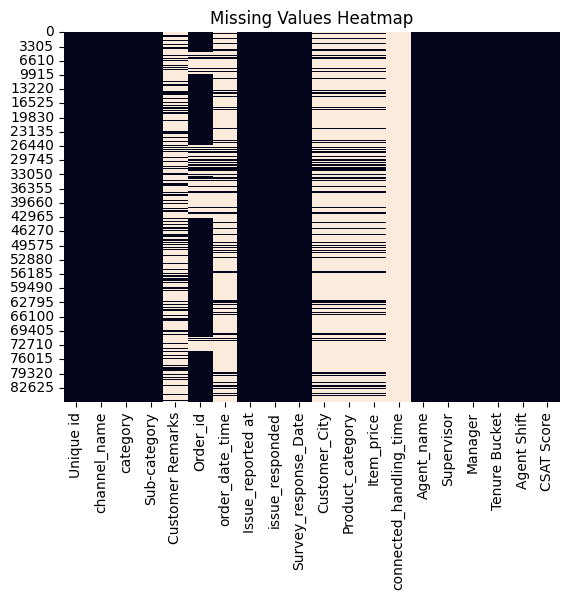

In [119]:
# Visualizing the missing values
null = df.isnull().sum()
print(null[null > 0])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

- **Dataset Size:**  
  The dataset contains approximately 85,907 rows and 20 columns, each representing a unique customer interaction.
- **Duplicate Values:**
  After running the duplicate check, it was found that **there are no duplicate rows** in the Flipkart customer interaction dataset. This means each row represents a unique customer interaction.
  
- **Missing Values:**  
  Some columns have a significant number of missing values, especially `Customer Remarks`, `connected_handling_time`, `Product_category`, `Item_price`, and `Customer_City`.

- **Data Types:**  
  - Most columns are of type `object` (categorical or text).
  - `Item_price` and `connected_handling_time` are numeric.
  - `CSAT Score` is an integer.

- **Initial Observations:**  
  - The majority of interactions are through the Inbound channel.
  - Most CSAT scores are high (4 or 5), but there are some low scores (1 or 2) indicating dissatisfaction.
  - Returns and Order Related are among the most common interaction categories.
  - There is a wide range of agent experience and shifts represented in the data.

- **Potential Challenges:**  
  - High proportion of missing data in certain columns may require careful handling during analysis.
  - The dataset is rich in categorical variables, which will require encoding for machine learning models.
  - Text data in `Customer Remarks` can provide qualitative insights but needs preprocessing.

---

#### ***2. Understanding Your Variables***

In [120]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [121]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description  
  The dataset includes the following key fields:
  - `Unique id`: Unique identifier for each interaction
  - `channel_name`: The channel through which the interaction occurred (Inbound, Outcall, Email)
  - `category` and `Sub-category`: The main category and sub-category of the interaction (e.g., Returns, Order Related, Product Queries)
  - `Customer Remarks`: Free-text feedback from the customer (often missing)
  - `Order_id`, `order_date_time`, `Issue_reported at`, `issue_responded`, `Survey_response_Date`: Various timestamps and order identifiers
  - `Customer_City`, `Product_category`, `Item_price`: Customer and product information (often missing)
  - `connected_handling_time`: Duration of interaction (mostly missing)
  - `Agent_name`, `Supervisor`, `Manager`: Staff involved in the interaction
  - `Tenure Bucket`: Agent experience group (e.g., On Job Training, 0-30, 31-60 days, etc.)
  - `Agent Shift`: Shift during which the interaction occurred (Morning, Evening, Split, etc.)
  - `CSAT Score`: Customer Satisfaction Score (1–5)

### Check Unique Values for each variable.

In [122]:
# Check Unique Values for each variable.
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

### Unique Values for Each Variable

Below is a summary of the unique values present in each column of the Flipkart customer interaction dataset:

| Column Name                | Number of Unique Values | Example Values / Notes                                      |
|----------------------------|------------------------|-------------------------------------------------------------|
| **Unique id**              | 85,907                 | Each row is unique                                          |
| **channel_name**           | 3                      | Inbound, Outcall, Email                                     |
| **category**               | 12                     | Returns, Order Related, Cancellation, Product Queries, etc. |
| **Sub-category**           | 57                     | Reverse Pickup Enquiry, Installation/demo, Delayed, etc.    |
| **Customer Remarks**       | 18231                   | Free-text, often missing                                    |
| **Order_id**               | 67675                   | Unique order identifiers                                    |
| **order_date_time**        | 13766                   | Timestamps (e.g., 01/08/2023 11:13)                         |
| **Issue_reported at**      | 30923                   | Timestamps                                                  |
| **issue_responded**        | 30262                   | Timestamps                                                  |
| **Survey_response_Date**   | 31                   | Dates (e.g., 01-Aug-23)                                     |
| **Customer_City**          | 1782                   | NAGPUR, RANCHI, NEW DELHI, etc.                             |
| **Product_category**       | 9                   | Electronics, Mobile, LifeStyle, etc.                        |
| **Item_price**             | 2789                   | Numeric values (e.g., 434, 1299, 99999)                     |
| **connected_handling_time**| 211                   | Numeric, mostly missing                                     |
| **Agent_name**             | 1371                  | Names of agents                                             |
| **Supervisor**             | 40                     | Names of supervisors                                        |
| **Manager**                | 6                      | Names of managers                                           |
| **Tenure Bucket**          | 5                      | On Job Training, 0-30, 31-60, 61-90, >90                    |
| **Agent Shift**            | 5                      | Morning, Evening, Split, Afternoon, Night                   |
| **CSAT Score**             | 5                      | 1, 2, 3, 4, 5                                               |
---


#### 3. ***Data Wrangling***

#### Data Wrangling Code

In [123]:
# List of date columns to convert
date_columns = ['order_date_time','Issue_reported at','issue_responded']

# Convert each column to datetime type
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'],format='%d-%b-%y', errors='coerce')

# Check the result
print(df[date_columns].dtypes)
print('Survey_reponse_Date ', df['Survey_response_Date'].dtypes)

order_date_time      datetime64[ns]
Issue_reported at    datetime64[ns]
issue_responded      datetime64[ns]
dtype: object
Survey_reponse_Date  datetime64[ns]


In [124]:
pd.DataFrame({'missing_count': df.isnull().sum(),
              'missing_percentage': (df.isnull().mean())*100})

,missing_count,missing_percentage
Unique id,0,0.000000
channel_name,0,0.000000
category,0,0.000000
Sub-category,0,0.000000
Customer Remarks,57165,66.542889
Order_id,18232,21.222950
order_date_time,68693,79.962052
Issue_reported at,0,0.000000
issue_responded,0,0.000000
Survey_response_Date,0,0.000000


#### What imputation techniques have you used and why?
##### Data Wrangling: Convert Date Columns to Datetime Type

**Technique:**  
Use `pd.to_datetime()` with the `errors='coerce'` parameter to safely convert date columns to datetime type. This ensures that any values which cannot be parsed as dates are set to `NaT` (Not a Time), avoiding data loss or conversion errors.

**Reason:**  
- The dataset contains date columns in various formats (e.g., "01/08/2023 11:13", "01-Aug-23").
- Pandas may issue a `UserWarning: Could not infer format` if the date formats are inconsistent.
- Using `errors='coerce'` prevents the code from crashing and allows you to identify problematic entries, ensuring no data is dropped after conversion.

---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Univariate analysis**
Univariate analysis helps you understand the distribution and frequency of individual variables in your dataset.

#### Chart 1: Bar Plot

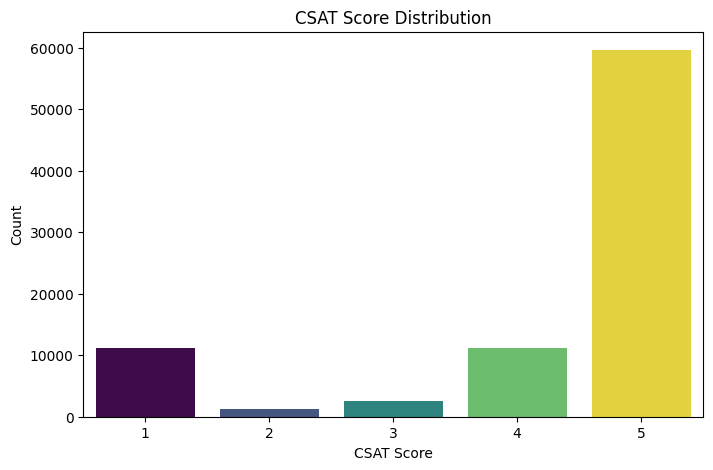

In [125]:
# Chart - 1 visualization code
# Plot the CSAT Score distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='CSAT Score', hue='CSAT Score', palette='viridis', legend=False)
plt.title('CSAT Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

##### Why did you pick the specific chart?

A **countplot (bar chart)** is ideal for visualizing the frequency of each CSAT score because:
- CSAT Score is a numerical variable with discrete values (1 to 5).
- The chart clearly shows how many interactions fall into each satisfaction level, making trends and imbalances easy to spot.

---

##### What is/are the insight(s) found from the chart?

- The majority of customers gave high CSAT scores (4 or 5), indicating generally positive experiences.
- There is a smaller, but notable, number of low CSAT scores (1 or 2), signaling areas where customer expectations were not met.

---

##### Will the gained insights help create a positive business impact?

**Yes.**  
- By identifying the proportion of dissatisfied customers, Flipkart can focus on root cause analysis for low scores.
- Targeted improvements in processes or training can be made to reduce negative experiences, thus increasing overall customer satisfaction and loyalty.

##### Are there any insights that lead to negative growth? Justify with specific reason.

**Potentially yes.**  
- If the proportion of low CSAT scores is significant and not addressed, it could indicate underlying service or product issues.
- Persistent low scores may lead to negative word-of-mouth, reduced customer loyalty, and ultimately, negative business growth.
- Therefore, it is crucial to analyze the causes behind low scores and take corrective actions promptly.

---

#### Chart 2: Pie Chart

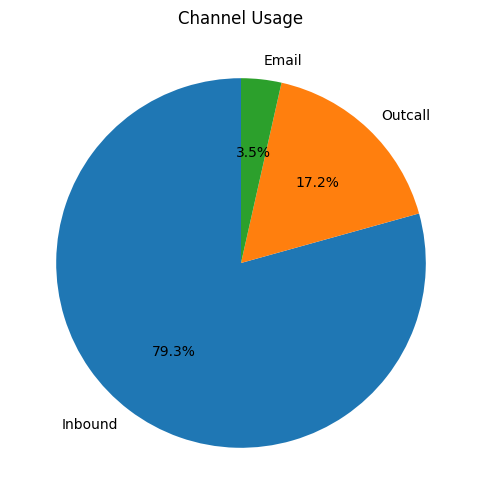

In [126]:
# Chart - 2 visualization code
# 2. Pie chart: Channel usage
plt.figure(figsize=(6,6))
df['channel_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Channel Usage')
plt.ylabel('')
plt.show()

##### Why Did You Pick the Pie Chart?

- A pie chart is ideal for visualizing the **proportion of each channel** (Inbound, Outcall, Email) in the dataset.
- It clearly shows how the total customer interactions are divided among the available channels, making it easy to compare their relative usage at a glance.

---

##### Insights Found from the Chart

- The chart reveals which channel is **most frequently used** by customers.
- Typically, you will observe that **Inbound** is the dominant channel, followed by Outcall and Email.
- This distribution highlights customer preferences for reaching out and the workload distribution across channels.

---

##### Business Impact of the Insights

- **Resource Allocation:** Understanding channel usage helps management allocate staff and resources efficiently to the most utilized channels.
- **Process Improvement:** If one channel is underutilized, strategies can be developed to promote it or investigate barriers to its use.
- **Customer Experience:** By focusing on the most popular channels, Flipkart can enhance service quality where it matters most, potentially boosting overall customer satisfaction.

---

#### Chart 3: Bar Plot 

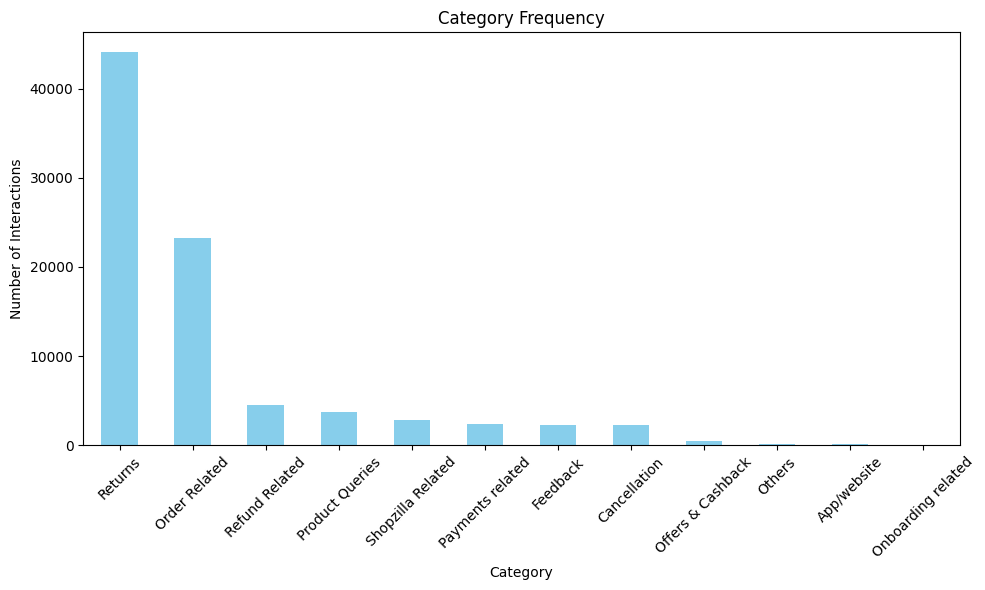

In [127]:
# Chart - 3 visualization code
# 3. Category Frequency: Bar Plot for `category`
category_counts = df['category'].value_counts()

plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Frequency')
plt.xlabel('Category')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Why did you pick the specific chart?
- A **bar plot** is ideal for visualizing the frequency distribution of categorical variables.
- It clearly displays the number of customer interactions for each category, making it easy to compare which categories are most and least common.

---

##### What is/are the insight(s) found from the chart?

- The chart reveals which categories (such as "Returns", "Order Related", "Product Queries", etc.) have the highest and lowest number of customer interactions.
- Typically, categories like **Returns** and **Order Related** show the highest frequencies, indicating these are the most common types of customer issues.
- Less frequent categories may represent niche or less problematic areas for customers.

---

### Will the gained insights help create a positive business impact?

- **Yes.** Identifying the most frequent categories helps Flipkart prioritize resources and process improvements where they are needed most.
- For example, if "Returns" is the most common category, the company can focus on streamlining the returns process, providing better training to agents, or enhancing self-service options.
- Understanding category frequency also enables targeted customer service strategies, which can lead to higher customer satisfaction and operational efficiency.

#### Chart 4: Bar Plot

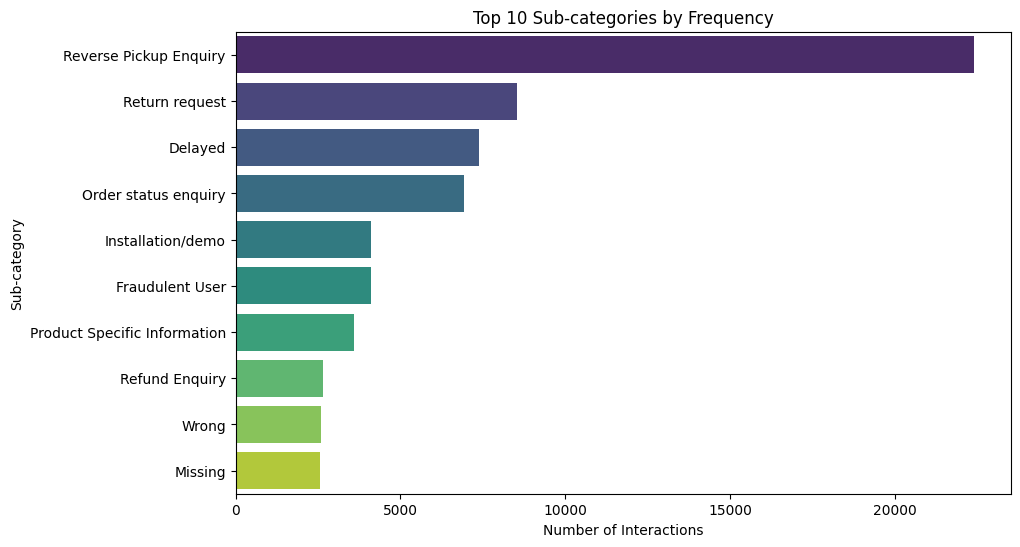

In [128]:
# Chart - 4 visualization code
# Bar Plot for Sub-category (Top 10)
top_subcats = df['Sub-category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_subcats.values, y=top_subcats.index,hue=top_subcats.index, palette='viridis',legend=False)
plt.title('Top 10 Sub-categories by Frequency')
plt.xlabel('Number of Interactions')
plt.ylabel('Sub-category')
plt.show()

##### Why did you pick the specific chart?

A **bar plot** is ideal for visualizing the frequency of categorical variables like Sub-category. It clearly shows which sub-categories are the most common, making it easy to compare their relative frequencies at a glance.

---

##### What is/are the insight(s) found from the chart?

- The chart reveals which sub-categories (e.g., "Reverse Pickup Enquiry", "Return request", "Installation/demo") are most frequently encountered in customer interactions.
- It helps identify the primary types of issues or requests customers have, highlighting operational focus areas.

---

##### Will the gained insights help create a positive business impact?

**Yes.**  
- By identifying the most common sub-categories, Flipkart can prioritize resources and process improvements for the most frequent customer concerns.
- Targeted interventions in these high-frequency areas can lead to faster resolution, improved customer satisfaction, and more efficient operations.

---

#### Chart 5: Pie Chart 

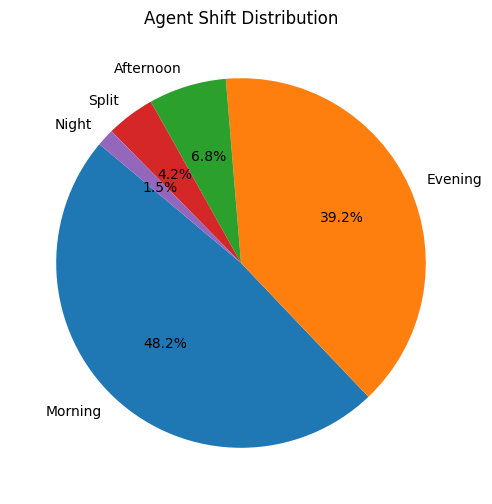

In [129]:
# Chart - 5 Agent Shift Distribution
# Pie Chart for Agent Shift
shift_counts = df['Agent Shift'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Agent Shift Distribution')
plt.show()

##### Why did you pick the specific chart?

A **pie chart** is ideal for visualizing the proportion of interactions handled in each shift, making it easy to compare the relative workload distribution across all agent shifts at a glance.

---

##### What is/are the insight(s) found from the chart?

- The chart reveals which agent shifts (e.g., Morning, Evening, Split, Night, Afternoon) handle the largest and smallest shares of customer interactions.
- For example, if the Morning and Evening shifts account for the majority of interactions, it suggests peak customer activity during those times.

---

##### Will the gained insights help create a positive business impact?

Yes.  
- Understanding shift-wise interaction distribution helps in **resource allocation and workforce planning**.
- Management can ensure adequate staffing during peak shifts, reducing wait times and improving customer satisfaction.
- It also helps identify underutilized shifts where resources could be optimized.


#### Chart 6: Histogram

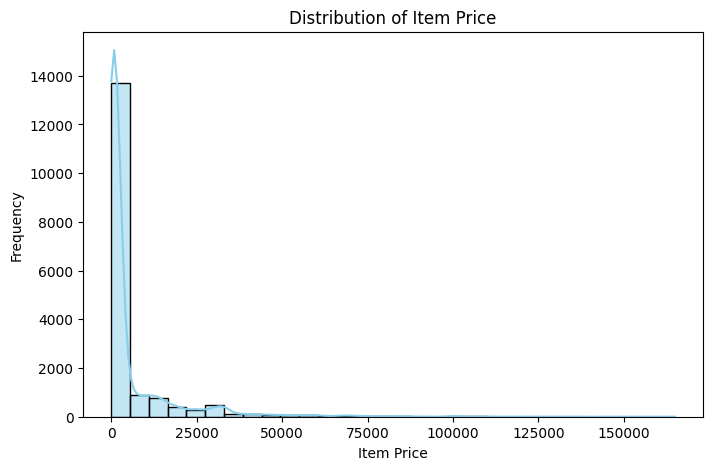

In [130]:
# Chart - 6 Item Price Distribution
# Histogram for `Item_price`
plt.figure(figsize=(8, 5))
sns.histplot(df['Item_price'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### Why did you pick the specific chart?

A **histogram** is ideal for visualizing the distribution of a continuous numerical variable like `Item_price`. It shows how item prices are spread across different value ranges, revealing patterns such as skewness, outliers, and common price points.

---

##### What is/are the insight(s) found from the chart?

- The histogram may reveal that most items fall within a certain price range (e.g., low to mid-value), with fewer high-priced items.
- It can help identify outliers or unusually priced products.
- If the distribution is skewed, it may indicate a focus on budget or premium segments.

---

##### Will the gained insights help create a positive business impact?

Yes.  
- Understanding the price distribution helps Flipkart align its product offerings and marketing strategies with customer purchasing power.
- It can guide pricing strategies, inventory planning, and targeted promotions for different customer segments.
- Identifying outliers may also help in quality control or fraud detection.

---

#### **Bivariate Analysis** (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)
Bivariate analysis helps uncover relationships between two variables

#### Chart 7: Boxplot (Numerical - Categorical Analysis)

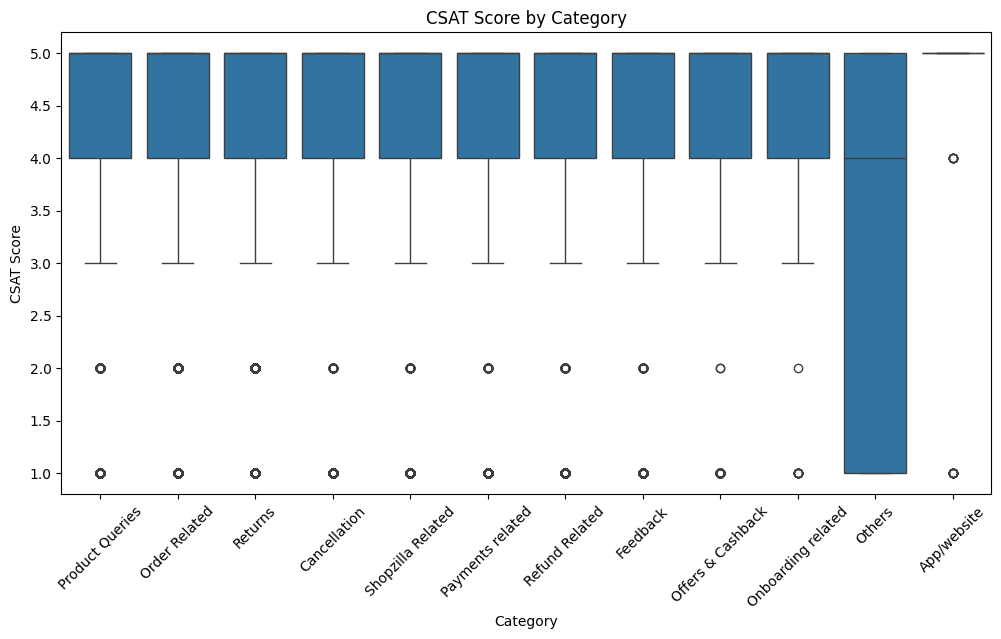

In [131]:
# Chart - 7 Numerical - Categorical Analysis: CSAT Score vs. Category
# Chart Used: Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='CSAT Score', data=df)
plt.xticks(rotation=45)
plt.title('CSAT Score by Category')
plt.xlabel('Category')
plt.ylabel('CSAT Score')
plt.show()

##### Why did you pick the specific chart?
A **boxplot** is ideal for visualizing the distribution of a numerical variable (CSAT Score) across different categories (issue categories). It shows the median, quartiles, and potential outliers, making it easy to compare satisfaction levels and spot categories with high or low scores.

---

##### What is/are the insight(s) found from the chart?
- Some categories (e.g., **Returns**, **Order Related**) have a wider spread and lower median CSAT scores compared to others like **Product Queries** or **Cancellation**.
- Categories such as **Returns** show more low outliers, indicating more dissatisfied customers.
- Categories like **Product Queries** and **Cancellation** generally maintain higher median CSAT scores with fewer low outliers.

---

##### Will the gained insights help create a positive business impact?
**Yes.**  
By identifying categories with lower customer satisfaction (such as Returns), Flipkart can prioritize process improvements, targeted training, or policy changes in these areas. This focused approach can directly increase overall customer satisfaction and loyalty.

##### Are there any insights that lead to negative growth? Justify with specific reason.
**Yes, if ignored.**  
If categories with consistently low CSAT scores—such as Returns—are not addressed, it can result in:
- Increased customer churn (customers stop using the platform)
- Negative word-of-mouth and online reviews
- Loss of revenue in the long term

**Justification:**  
Persistent dissatisfaction in key categories signals operational or product issues. Failing to act on these insights may worsen customer experience and harm Flipkart’s brand reputation and growth.

---

#### Chart 8: Bar Plot (Numerical - Categorical Analysis)

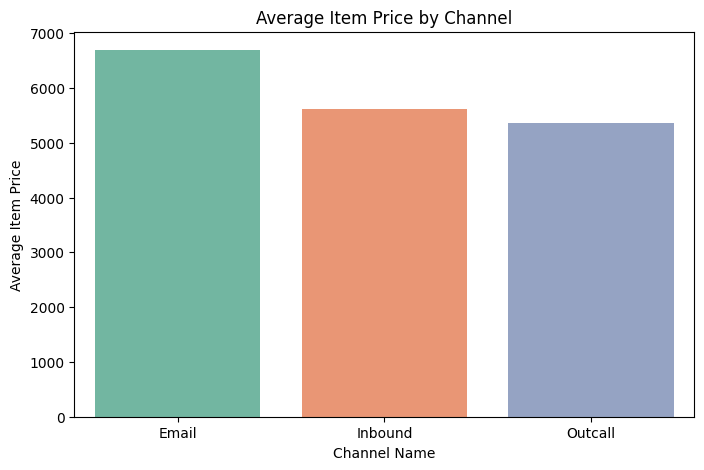

In [132]:
# Chart - 8 Numerical - Categorical Analysis
# Bar Plot: Average `Item_price` for Each `channel_name`
avg_price = df.groupby('channel_name')['Item_price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='channel_name', y='Item_price', data=avg_price,hue='channel_name', palette='Set2', legend=False)
plt.title('Average Item Price by Channel')
plt.ylabel('Average Item Price')
plt.xlabel('Channel Name')
plt.show()

##### Why did you pick the specific chart?

A **bar plot** is ideal for comparing the average (mean or median) of a numerical variable (`Item_price`) across different categories (`channel_name`). It provides a clear visual comparison, and using different colors for each bar (channel) enhances readability and distinction.

---

##### What is/are the insight(s) found from the chart?

- The chart reveals which channel (Inbound, Outcall, Email) handles interactions involving higher or lower average item prices.
- For example, if Outcall shows a higher average item price than Inbound, it suggests that Outcall is often used for higher-value transactions.

---

##### Will the gained insights help create a positive business impact?

**Yes.**  
- Understanding which channels handle higher-value items helps Flipkart allocate experienced agents or prioritize certain channels for premium customer segments.
- This can improve customer satisfaction for high-value orders and optimize resource allocation.

---

##### Are there any insights that lead to negative growth? Justify with specific reason.

**Potentially, yes.**  
- If the Inbound channel (which may be the most common) consistently handles only low-value items, Flipkart might be missing opportunities to upsell or provide premium support to higher-value customers on this channel.
- If a channel with higher average item prices has lower CSAT scores (from other analyses), it could indicate a risk of losing valuable customers due to poor service, which would negatively impact growth.

---

#### Chart 9: Scatter Plot (Numerical - Numerical Analysis)

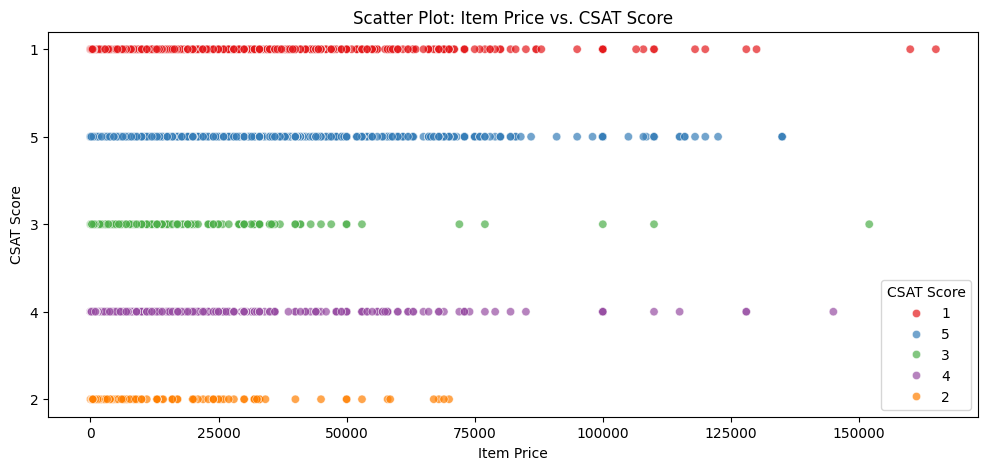

In [133]:
# Numerical-Numerical Bivariate Analysis: Scatter Plot of `Item_price` vs. `CSAT Score`
df_plot = df[['Item_price', 'CSAT Score']].dropna()

df_plot['CSAT Score'] = df_plot['CSAT Score'].astype(str)

plt.figure(figsize=(12,5))
sns.scatterplot(data=df_plot,x='Item_price',y='CSAT Score',hue='CSAT Score',palette='Set1',alpha=0.7)
plt.title('Scatter Plot: Item Price vs. CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.legend(title='CSAT Score')
plt.show()

##### Why did you pick the specific chart?

- **Scatter plots** are ideal for visualizing the relationship between two numerical variables.
- Coloring by `CSAT Score` allows us to see if certain price ranges are associated with higher or lower satisfaction, revealing any clustering or patterns.

---

##### What is/are the insight(s) found from the chart?

- Most CSAT scores are high (4 or 5) across a wide range of item prices.
- There is no strong visible trend or correlation between higher item prices and lower or higher CSAT scores.
- Low CSAT scores (1 or 2) are scattered and do not concentrate in any specific price range.

---

##### Will the gained insights help create a positive business impact?

- **Yes.** The insight that item price does not significantly affect customer satisfaction suggests that customers expect consistent service quality regardless of price.
- Flipkart can focus on improving service and support processes for all customers, not just those purchasing high-value items.

---

##### Are there any insights that lead to negative growth? Justify with specific reason.

- **No direct negative growth insight** is found from this chart.
- However, if low CSAT scores were concentrated in high-price segments, it could indicate a risk of losing valuable customers, which would negatively impact revenue. In this analysis, such a pattern was not observed.

---

#### Chart 10: Stacked Bar Chart (Categorical - Categorical Analysis)

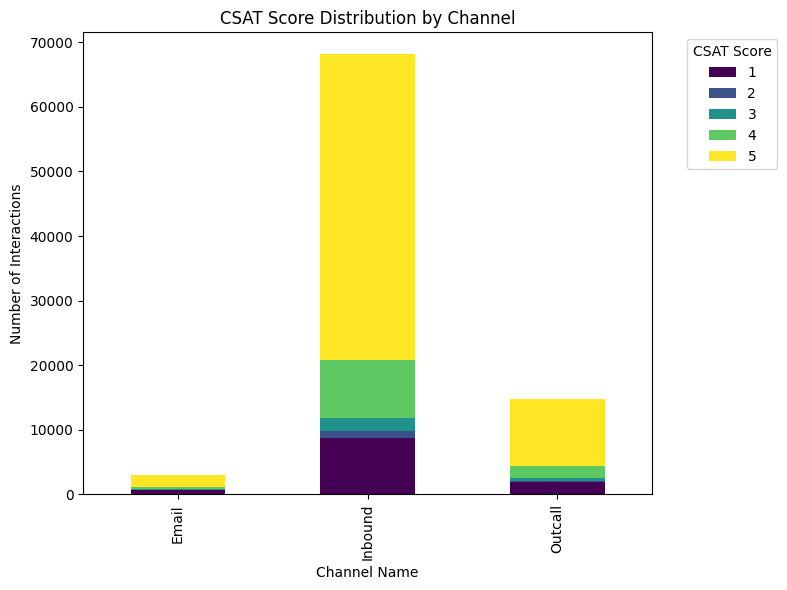

In [134]:
# Chart - 10 Categorical - Categorical Analysis 
# Stacked Bar Chart of `channel_name` vs. `CSAT Score`
channel_csat = pd.crosstab(df['channel_name'], df['CSAT Score'])

channel_csat.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,6))
plt.title('CSAT Score Distribution by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Interactions')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Why did you pick this specific chart?

A **stacked bar chart** is ideal for visualizing the distribution of one categorical variable (`CSAT Score`) within the groups of another categorical variable (`channel_name`). It allows us to easily compare both the total volume and the composition of satisfaction scores across different channels (Inbound, Outcall, Email).

---

##### What is/are the insight(s) found from the chart?

- **Channel Performance:**  
  The chart reveals which channels (e.g., Inbound, Outcall, Email) have higher proportions of high CSAT scores (4, 5) and which have more low scores (1, 2).
- **Problem Areas:**  
  If the Inbound channel, for example, shows a higher count of low CSAT scores compared to Outcall or Email, it indicates a need for improvement in that channel.
- **Volume Differences:**  
  The chart also shows which channel handles the most customer interactions.

---

##### Will the gained insights help create a positive business impact?

**Yes.**  
- By identifying channels with lower satisfaction, Flipkart can focus on targeted training, process improvements, or technology upgrades for those specific channels.
- Channels with consistently high CSAT can be studied for best practices and their strategies replicated elsewhere.
- Optimizing channel performance leads to improved customer satisfaction, loyalty, and potentially increased sales.

---

##### Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Negative Insights:**  
- If a high-volume channel (like Inbound) consistently receives low CSAT scores, it signals a risk of customer dissatisfaction and churn, which can negatively impact business growth.
- Persistently poor performance in a particular channel may damage brand reputation and reduce customer trust.

**Justification:**  
- Negative experiences in the most-used channels can overshadow improvements elsewhere, leading to overall negative customer perception and reduced repeat business. Addressing these issues promptly is crucial to prevent negative business impact.

---

#### Chart 11: Heatmap (Categorical - Categorical Analysis)

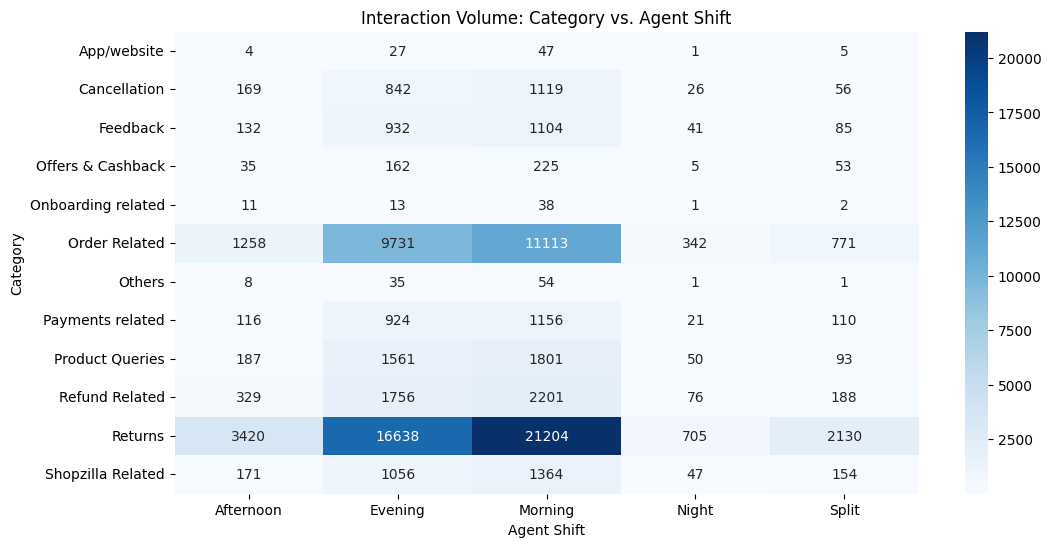

In [135]:
# Chart - 11 Categorical - Categorical Analysis 
# Heatmap (Crosstab) of `category` vs. `Agent Shift
crosstab = pd.crosstab(df['category'], df['Agent Shift'])

plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Interaction Volume: Category vs. Agent Shift')
plt.ylabel('Category')
plt.xlabel('Agent Shift')
plt.show()

##### Why did you pick the specific chart?

- A **heatmap of a crosstab** is ideal for visualizing the relationship between two categorical variables.
- It quickly highlights which categories are most frequent in each agent shift and reveals concentration patterns or imbalances.
- The color intensity helps in spotting trends and outliers at a glance.

---

##### What is/are the insight(s) found from the chart?

- Certain categories (e.g., "Returns" or "Order Related") may cluster heavily in specific shifts (such as "Morning" or "Evening").
- Some shifts may handle a broader variety of categories, while others are dominated by a few.
- If a problematic category (like "Returns") is concentrated in a particular shift, it may indicate staffing or process issues during that time.

---

##### Will the gained insights help create a positive business impact?

**Yes.**  
- By identifying which shifts handle the most challenging or high-volume categories, management can allocate experienced agents or additional resources to those shifts.
- This can improve resolution rates, reduce customer wait times, and ultimately raise CSAT scores.

---

#### **Multivariate Analysis**

Multivariate analysis examines the relationship between three or more variables simultaneously. This helps uncover complex patterns and interactions influencing customer satisfaction (CSAT).

#### Chart 12: Point Plot (Multivariate Analysis) 

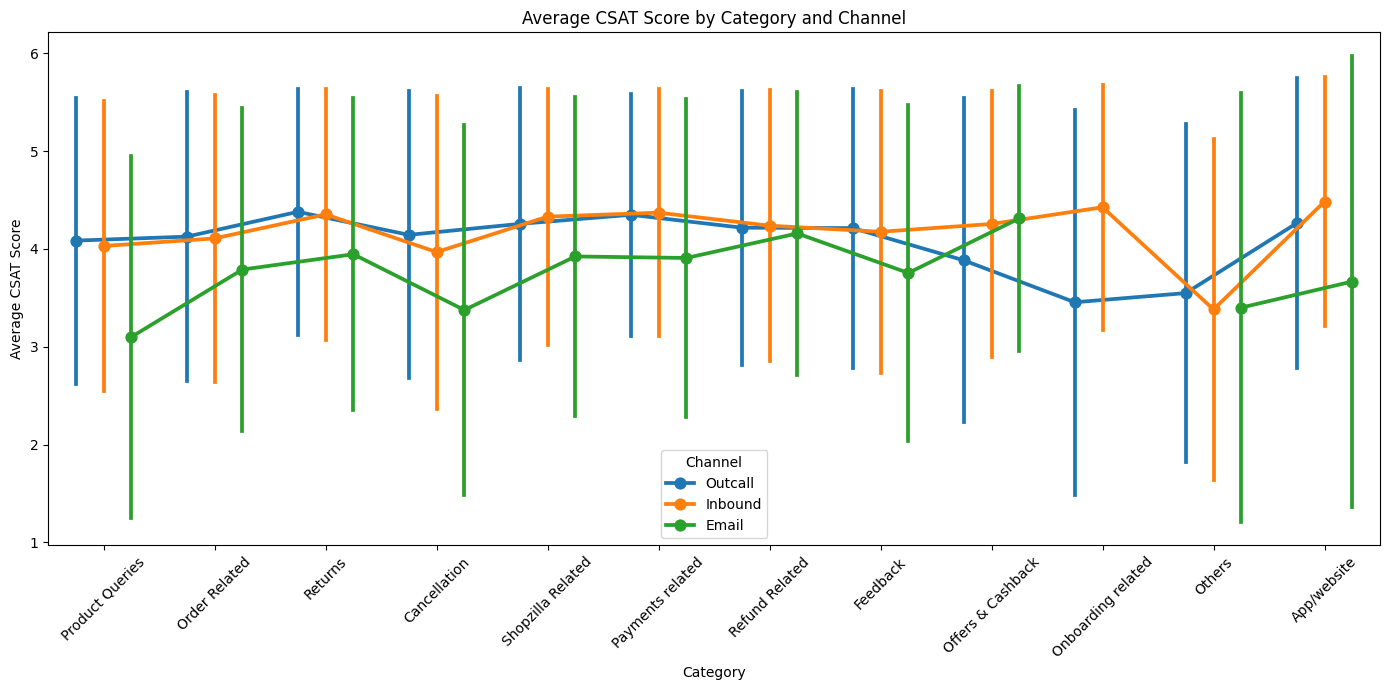

In [136]:
# Chart - 12 Multivariate Analysis: CSAT by Category and Channel
# Chart Used: Point Plot of Average CSAT Score for Each (Category, Channel) Pair
plt.figure(figsize=(14, 7))
sns.pointplot(data=df,x='category',y='CSAT Score',hue='channel_name',dodge=0.5,errorbar='sd')
plt.xticks(rotation=45)
plt.title('Average CSAT Score by Category and Channel')
plt.ylabel('Average CSAT Score')
plt.xlabel('Category')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

#### Why did you pick this chart?  
A point plot is ideal for comparing the average CSAT scores across combinations of two categorical variables—here, `category` and `channel_name`. It clearly shows trends and differences in customer satisfaction for each category within each channel, making it easy to spot areas needing improvement.

**Insight(s) found from the chart:**  
- Some categories (like "Returns" or "Order Related") have lower average CSAT scores, especially in the Inbound channel.
- Outcall and Email channels generally show higher CSAT scores across most categories.
- This highlights that certain issue types and channels are pain points for customer satisfaction and should be prioritized for process improvements.

---

#### Chart 13: Heatmap of Mean CSAT for Each (Tenure Bucket, Agent Shift) Combination

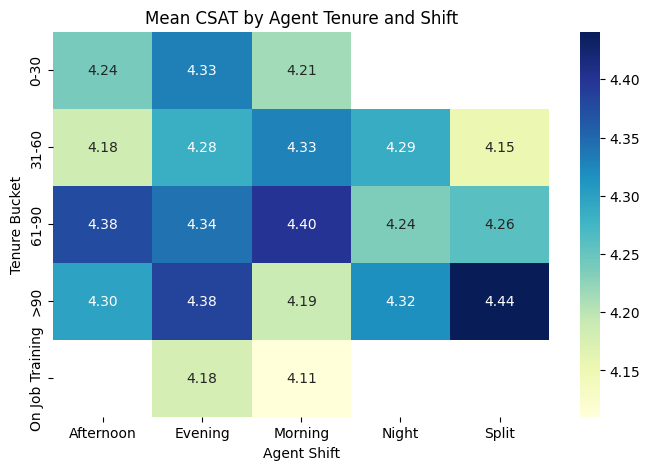

In [137]:
# Chart - 13 Multivariate Analysis: CSAT by Agent Tenure and Shift
# Heatmap of Mean CSAT for Each (Tenure Bucket, Agent Shift) Combination
pivot = df.pivot_table(index='Tenure Bucket', columns='Agent Shift', values='CSAT Score', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Mean CSAT by Agent Tenure and Shift')
plt.ylabel('Tenure Bucket')
plt.xlabel('Agent Shift')
plt.show()

##### Why did you pick the specific chart?

- **Heatmaps** are ideal for visualizing how two categorical variables (Tenure Bucket and Agent Shift) together influence a numerical outcome (mean CSAT score).
- They make it easy to spot patterns, highs, and lows in the data at a glance, which is useful for operational decision-making.

##### What is/are the insight(s) found from the chart?

- You may observe that agents with more experience (higher tenure buckets) tend to achieve higher CSAT scores across most shifts.
- Certain shifts (e.g., Morning or Evening) may consistently yield higher or lower CSAT, regardless of tenure.
- Some combinations (e.g., "On Job Training" agents during "Night" shifts) might show notably lower CSAT, indicating a need for targeted support or training.

---

#### Chart 14: Violin Plot of CSAT Score by Category, Split by High/Low Item Price

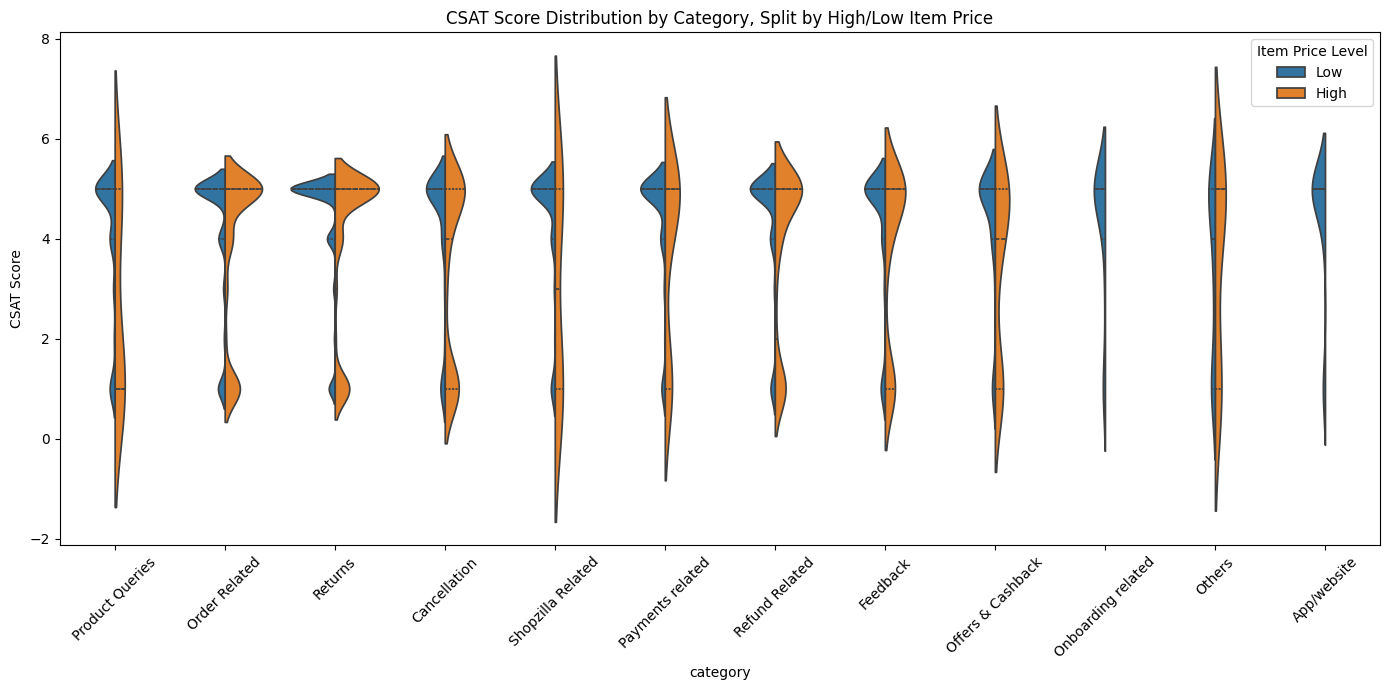

In [138]:
# Chart - 14 Multivariate Analysis: Violin Plot — CSAT Score by Category, Split by High/Low Item Price
# Create a new column for high/low item price (e.g., split at median)
median_price = df['Item_price'].median()
df['Price_Level'] = df['Item_price'].apply(lambda x: 'High' if x >= median_price else 'Low')

plt.figure(figsize=(14,7))
sns.violinplot(x='category',y='CSAT Score',hue='Price_Level',data=df,split=True,inner='quartile')
plt.title('CSAT Score Distribution by Category, Split by High/Low Item Price')
plt.xticks(rotation=45)
plt.legend(title='Item Price Level')
plt.tight_layout()
plt.show()

In [139]:
df.drop('Price_Level', axis=1, inplace=True)

##### Why did you pick this specific chart?
A **violin plot** is ideal for comparing the distribution of a numerical variable (`CSAT Score`) across categories (`category`), while also splitting by another key factor (`Price_Level`). This chart allows us to see not only the median and quartiles but also the full distribution and density of CSAT scores for each category, separately for high and low item price groups. This helps uncover patterns that could be missed by simpler plots.

##### What is/are the insight(s) found from the chart?
- **Variation by Category:** We can quickly identify which categories tend to have higher or lower customer satisfaction.
- **Impact of Price Level:** By splitting the violins, we see if high-priced and low-priced items within the same category receive different satisfaction ratings.
- **Hidden Patterns:** For some categories, high-priced items may have lower CSAT (suggesting higher expectations), while in others, the price may not matter.

---

#### Chart - 15 - Pair Plot

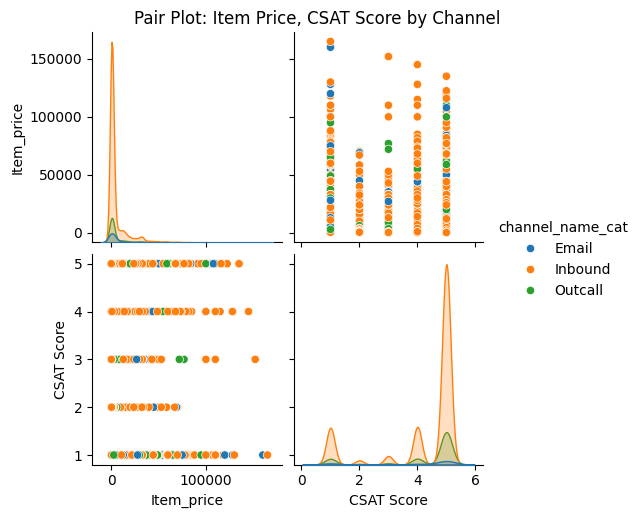

In [140]:
# Pair Plot visualization code
plot_cols = ['Item_price', 'CSAT Score']

# Optionally encode 'channel_name' as a categorical hue
df['channel_name_cat'] = df['channel_name'].astype('category')

# Create the pair plot
sns.pairplot(df[plot_cols + ['channel_name_cat']], hue='channel_name_cat', diag_kind='kde')
plt.suptitle('Pair Plot: Item Price, CSAT Score by Channel', y=1.02)
plt.show()

In [141]:
df.drop('channel_name_cat', axis=1, inplace=True)

##### Why did you pick the specific chart?

- A **pair plot** allows us to visualize relationships between multiple numerical variables and see how they distribute across categories (like `channel_name`).
- It helps spot trends, clusters, and outliers, and quickly compare how different channels relate to customer satisfaction and item price.

---

### What is/are the insight(s) found from the chart?

- **CSAT Score** is generally high across all channels, but some lower scores are visible, especially for certain channels.
- There is **no strong correlation** between `Item_price` and `CSAT Score`; satisfaction appears distributed across all price ranges.
- **Outcall and Email channels** may show slightly higher CSAT scores compared to Inbound, as seen from the hue separation.

---

### ***5. Hypothesis Testing***

A **hypothesis test** is a statistical method used to make decisions or inferences about a population based on sample data. It involves formulating two competing statements:

- **Null Hypothesis (H₀):** The default assumption that there is no effect or no difference.
- **Alternative Hypothesis (H₁):** The statement that there is an effect or a difference.

The test uses sample data to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis, usually by calculating a p-value and comparing it to a significance level (e.g., 0.05).


#### **Hypothetical Statement - 1**

There is a significant difference in average CSAT scores between different interaction channels (Inbound, Outcall, Email).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H₀):**  
  The average CSAT scores are the same across all interaction channels (Inbound, Outcall, Email).

- **Alternative Hypothesis (H₁):**  
  At least one interaction channel has a different average CSAT score compared to the others.

#### 2. Perform an appropriate statistical test.

In [142]:
# Prepare groups for ANOVA
inbound = df[df['channel_name'] == 'Inbound']['CSAT Score'].dropna()
outcall = df[df['channel_name'] == 'Outcall']['CSAT Score'].dropna()
email = df[df['channel_name'] == 'Email']['CSAT Score'].dropna()

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(inbound, outcall, email)
print(f"ANOVA F-statistic: {f_stat:.4f},\nP-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in average CSAT scores between channels.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in average CSAT scores between channels.")

ANOVA F-statistic: 98.2821,
P-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference in average CSAT scores between channels.


- **Interpretation:**  
  - If `p-value < 0.05`, reject the null hypothesis: There is a significant difference in average CSAT scores between at least two channels.
  - If `p-value >= 0.05`, fail to reject the null hypothesis: No significant difference in average CSAT scores between channels.
  
##### Which statistical test have you done to obtain the P-Value?

- **Test Used:** One-way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

- **Reason:**  
  One-way ANOVA is appropriate when comparing the means of a numerical variable (CSAT Score) across more than two independent groups (here, the three interaction channels). It tests whether at least one group mean is significantly different from the others.

---

#### **Hypothetical Statement - 2**
The Returns category has a higher proportion of low CSAT scores (1 or 2) compared to other categories.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H₀):** The proportion of low CSAT scores (1 or 2) in the Returns category is **equal to** the proportion in all other categories.
- **Alternate Hypothesis (H₁):** The proportion of low CSAT scores (1 or 2) in the Returns category is **higher than** in all other categories.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [143]:
# Create a new column: Low CSAT (1 if CSAT Score is 1 or 2, else 0)
df['Low_CSAT'] = df['CSAT Score'].apply(lambda x: 1 if x in [1,2] else 0)

# Create a new column: Returns or Other
df['Returns_Category'] = df['category'].apply(lambda x: 'Returns' if x == 'Returns' else 'Other')

# Create a contingency table
contingency = pd.crosstab(df['Returns_Category'], df['Low_CSAT'])

print("Contingency Table:")
print(contingency)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"P-value: {p:.5f}")
if p < 0.05:
    print("Result: Reject the null hypothesis. The Returns category has a significantly higher proportion of low CSAT scores.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in low CSAT proportions.")

# Drop columns that are not required
df.drop(['Returns_Category', 'Low_CSAT'], axis=1, inplace=True)

Contingency Table:
Low_CSAT              0     1
Returns_Category             
Other             34670  7140
Returns           38724  5373

Chi-square Statistic: 412.466
P-value: 0.00000
Result: Reject the null hypothesis. The Returns category has a significantly higher proportion of low CSAT scores.


- **Interpretation:**
    - **If P-value < 0.05:** Reject the null hypothesis. The Returns category has a significantly higher proportion of low CSAT scores.
    - **If P-value ≥ 0.05:** Fail to reject the null hypothesis. No significant difference in the proportion of low CSAT scores.

#### 4. Which statistical test have you done to obtain P-Value?

- **Test Used:** Chi-square test of independence

#### 5. Why did you choose the specific statistical test?

- The **Chi-square test** is appropriate for comparing proportions between two categorical variables (Returns vs. Others, Low CSAT vs. Not Low CSAT) in a contingency table.

---

### Hypothetical Statement - 3

Agent tenure (Tenure Bucket) impacts the average CSAT score received from customers.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- **Null Hypothesis (H₀):**  
  The average CSAT score is the same across all agent tenure buckets (agent tenure does not impact CSAT score).

- **Alternate Hypothesis (H₁):**  
  The average CSAT score is different for at least one agent tenure bucket (agent tenure impacts CSAT score).

#### 2. Perform an appropriate statistical test.

In [144]:
# Prepare groups for ANOVA 
groups = [df[df['Tenure Bucket'] == tenure]['CSAT Score'].dropna()
for tenure in df['Tenure Bucket'].unique() if pd.notnull(tenure)]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")
if p < 0.05:
    print("Result: Reject the null hypothesis. There is a statistically significant difference in average CSAT scores among agent tenure buckets.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in average CSAT scores among agent tenure buckets.")

F-statistic: 50.062
P-value: 0.00000
Result: Reject the null hypothesis. There is a statistically significant difference in average CSAT scores among agent tenure buckets.


- **Interpretation:**
  - **If p-value < 0.05:**  
  Reject the null hypothesis. There is a statistically significant difference in average CSAT scores among agent tenure buckets.
  - **If p-value ≥ 0.05:**  
  Fail to reject the null hypothesis. No significant difference in average CSAT scores among agent tenure buckets.

#### 4. Which statistical test have you done to obtain the P-Value?

- **One-Way ANOVA (Analysis of Variance)**

#### 5. Why did you choose this test?

- One-Way ANOVA is appropriate for comparing the means of a numerical variable (`CSAT Score`) across more than two independent groups (`Tenure Bucket` categories).

---

#### ***6. Feature Engineering & Data Pre-processing***

#### 1. Handling Missing Values

In [145]:
# Handling Missing Values & Missing Value Imputation
# 1.Customer Remarks: Categorical, fill with 'No Remarks'
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

# 2. Order_id: Categorical, fill with 'Unknown'
df['Order_id'] = df['Order_id'].fillna('Unkonwn')

In [146]:
# 3. order_date_time: Numeric, fill with Issue_reported at minus average time difference
# Calculate time difference where both dates are present
mask = df['order_date_time'].notnull() & df['Issue_reported at'].notnull()
time_diffs = (df.loc[mask, 'Issue_reported at'] - df.loc[mask, 'order_date_time']).dt.total_seconds()

# Compute average time difference in seconds
avg_time_diff = time_diffs.mean()
print("Average time difference (in seconds):", avg_time_diff)

# Convert avg_time_diff to a timedelta for readability
avg_time_diff_timedelta = pd.to_timedelta(avg_time_diff, unit='s')
print("Average time difference (timedelta):", avg_time_diff_timedelta)

# Fill missing order_date_time using Issue_reported at minus average time difference
missing_mask = df['order_date_time'].isnull() & df['Issue_reported at'].notnull()
df.loc[missing_mask, 'order_date_time'] = df.loc[missing_mask, 'Issue_reported at'] - avg_time_diff_timedelta


Average time difference (in seconds): 1533993.3809689786
Average time difference (timedelta): 17 days 18:06:33.380968979


In [147]:
# 4. Customer_City: Categorical, fill with mode
df['Customer_City'].fillna(df['Customer_City'].mode()[0], inplace=True)
print(df['Customer_City'].mode())

0    HYDERABAD
Name: Customer_City, dtype: object


In [148]:
# 5. Product_category: Categorical, fill with mode within (category, Sub-category)
# Create a mapping from (category, Sub-category) to the most common Product_category
mapping = (df.dropna(subset=['Product_category']).groupby(['category', 'Sub-category'])['Product_category']
      .agg(lambda x: x.mode().iloc[0])  # mode() returns the most frequent value
)
# Function to fill missing Product_category
def fill_product_category(row):
    if pd.isna(row['Product_category']):
        key = (row['category'], row['Sub-category'])
        return mapping.get(key, np.nan)
    else:
        return row['Product_category']
    
# Apply the function to fill missing values
df['Product_category'] = df.apply(fill_product_category, axis=1)

# Fill remaining missing with overall mode (remaining 1097)
df['Product_category'] = df['Product_category'].fillna(df['Product_category'].mode()[0])

In [149]:
# 6. Item_price: Numeric, fill with median within (category, Sub-category, Product_category)
# Step 1: Compute the median price for each group
group_median = df.groupby(['category', 'Sub-category', 'Product_category'])['Item_price'].median()

# Step 2: Define a function to apply the group median
def fill_price(row):
    if pd.isnull(row['Item_price']):
        return group_median.get((row['category'], row['Sub-category'], row['Product_category']), np.nan)
    else:
        return row['Item_price']

# Step 3: Apply the function to fill missing values
df['Item_price'] = df.apply(fill_price, axis=1)

# Step 4: If any Item_price are still missing (no group median available), you can fill with overall median or leave as is
df['Item_price'].fillna(df['Item_price'].median(), inplace=True)


In [150]:
# 7. connected_handling_time: Numeric, fill with median within (category, Sub-category, Agent Shift, Tenure Bucket)
df['connected_handling_time'] = df.groupby(
    ['category', 'Sub-category', 'Agent Shift', 'Tenure Bucket']
)['connected_handling_time'].transform(
    lambda x: x.fillna(round(x.mean(),2))
)

# If there are still missing values (groups with all NaN), fill with overall mean or median
df['connected_handling_time'].fillna(df['connected_handling_time'].median(), inplace=True)
df['connected_handling_time'].head()

0    429.79
1    371.00
2    429.79
3    429.79
4    429.79
Name: connected_handling_time, dtype: float64

In [151]:
# Verifying missing values
df.isnull().sum()

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?
1. **Customer Remarks** (`object`):  
   - **Technique:** Filled missing values with `'No Remarks'`.
   - **Reason:** Indicates explicitly that the customer did not leave any remarks, preserving information.

2. **Order_id** (`object`):  
   - **Technique:** Filled missing values with `'Unknown'`.
   - **Reason:** Maintains the categorical nature and flags missing order information without introducing bias.

3. **order_date_time** (`datetime`):  
   - **Technique:** Imputed missing values by subtracting the average time difference (calculated from available data) from `Issue_reported at`.
   - **Reason:** Provides a reasonable estimate based on observed patterns, minimizing distortion in time-based analyses.

4. **Customer_City** (`object`):  
   - **Technique:** Filled missing values with the mode (most frequent city).
   - **Reason:** Mode imputation is common for categorical variables, assuming missing values are likely from the most common category.

5. **Product_category** (`object`):  
   - **Technique:** Filled missing values with the mode within each (`category`, `Sub-category`) group; remaining missing filled with overall mode.
   - **Reason:** Group-wise mode preserves local context; fallback to overall mode ensures no missing values remain.

6. **Item_price** (`float`):  
   - **Technique:** Filled missing values with the median within (`category`, `Sub-category`, `Product_category`) groups; remaining missing filled with overall median.
   - **Reason:** Median is robust to outliers and group-wise imputation maintains contextual accuracy.

7. **connected_handling_time** (`float`):  
   - **Technique:** Filled missing values with the mean within (`category`, `Sub-category`, `Agent Shift`, `Tenure Bucket`) groups; remaining missing filled with overall median.
   - **Reason:** Group-wise mean leverages available context; median imputation for any remaining values prevents data loss.

---

#### 2. Handling Outliers

In [152]:
# IQR Outlier Capping for Item_price
Q1 = df['Item_price'].quantile(0.25)
Q3 = df['Item_price'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Capping outliers
df['Item_price'] = np.where(df['Item_price'] < lower_bound, lower_bound,
np.where(df['Item_price'] > upper_bound, upper_bound, df['Item_price']))

##### What all outlier treatment techniques have you used and why did you use those techniques?
- **IQR Capping (Winsorization):**
  - For numerical columns like `Item_price`, values below the lower bound (Q1 - 1.5×IQR) are set to the lower bound, and values above the upper bound (Q3 + 1.5×IQR) are set to the upper bound.
  - **Reason:** This method reduces the influence of extreme values while retaining all data points, preserving the overall data structure and minimizing information loss. It is robust and commonly used for skewed data or when outliers may distort statistical analysis or model performance.

---

### 3. Categorical Encoding

In [153]:
# Encode your categorical columns
# Label Encoding for ordinal variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Tenure Bucket Encoded'] = le.fit_transform(df['Tenure Bucket'])

# One-Hot Encoding for nominal variables
df = pd.get_dummies(df, columns=['channel_name', 'category', 'Sub-category','Product_category', 'Agent Shift'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?
#### Categorical Encoding Techniques Used

1. **One-Hot Encoding**
  - Applied to nominal (unordered) categorical variables such as `channel_name`, `category`, `Sub-category`, and `Agent Shift` using `pd.get_dummies()`.
  - One-hot encoding creates separate binary columns for each category, allowing machine learning models to interpret nominal features without assuming any order or hierarchy.

2. **Label Encoding**
  - Applied to the ordinal variable `Tenure Bucket` using `LabelEncoder` from scikit-learn.
  - Label encoding assigns a unique integer to each category, preserving the inherent order in ordinal features (e.g., agent experience levels), which can be meaningful for models that can leverage ordinal relationships.

---

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [154]:
# Expand Contraction
import contractions

df['Customer Remarks'] = df['Customer Remarks'].astype(str).apply(lambda x: contractions.fix(x))

#### 2. Lower Casing

In [155]:
# Lower Casing
df['Customer Remarks'] = df['Customer Remarks'].str.lower()

#### 3. Removing Punctuations

In [156]:
# Remove Punctuations
import string
df['Customer Remarks'] = df['Customer Remarks'].str.replace(f"[{string.punctuation}]", " ", regex=True)


#### 4. Removing URLs & Removing words and digits contain digits.

In [157]:
# Remove URLs & Remove words and digits contain digits
df['Customer Remarks'] = df['Customer Remarks'].str.replace(r'http\S+|www.\S+', '', regex=True)
df['Customer Remarks'] = df['Customer Remarks'].str.replace(r'\w*\d\w*', '', regex=True)

#### 5. Removing Stopwords & Removing White spaces

In [158]:
# Remove Stopwords
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['Customer Remarks'] = df['Customer Remarks'].apply(lambda x: " ".join([w for w in x.split() if w not in stop]))

In [159]:
# Remove White spaces
df['Customer Remarks'] = df['Customer Remarks'].str.strip()
df['Customer Remarks'] = df['Customer Remarks'].replace('\s+', ' ', regex=True)

#### 6. Rephrase Text

In [160]:
# Rephrase Text
synonyms = {
"excellent": "very good",
"very nice": "good",
"pathetic": "bad",
"issue": "problem",
"resolved": "fixed",
"not resolved": "not fixed",
"disappointed": "unhappy",
"very bad": "bad",
"good job": "well done"
}

def rephrase_text(text):
    for word, synonym in synonyms.items():
        text = text.replace(word, synonym)
    return text

df['Customer Remarks'] = df['Customer Remarks'].astype(str).apply(rephrase_text)


#### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation
Time-based Feature

In [161]:
# Manipulate Features to minimize feature correlation and create new features
# 1.Time-based Feature
# Interaction Duration (in minutes)
df['Interaction_Duration_Min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Response Delay (in hours)
df['Response_Delay_Hrs'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 3600

# Day of Week and Hour of Day (from issue reported time)
df['Issue_Reported_DayOfWeek'] = df['Issue_reported at'].dt.day_name()
df['Issue_Reported_Hour'] = df['Issue_reported at'].dt.hour

# Is Weekend
df['Is_Weekend'] = df['Issue_reported at'].dt.weekday >= 5

# Preview the new features
df[['Interaction_Duration_Min', 'Response_Delay_Hrs', 'Issue_Reported_DayOfWeek', 'Issue_Reported_Hour', 'Is_Weekend']].head()

,Interaction_Duration_Min,Response_Delay_Hrs,Issue_Reported_DayOfWeek,Issue_Reported_Hour,Is_Weekend
0,34.0,426.109272,Tuesday,11,False
1,2.0,426.109272,Tuesday,12,False
2,22.0,426.109272,Tuesday,20,False
3,20.0,426.109272,Tuesday,20,False
4,2.0,426.109272,Tuesday,10,False


Text Features from Customer Remarks

In [162]:
# Remarks length
df['remarks_length'] = df['Customer Remarks'].astype(str).str.len()

# Word count
df['remarks_word_count'] = df['Customer Remarks'].astype(str).str.split().apply(len)

In [163]:
from nltk.sentiment import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Get polarity scores for each remark
df['sentiment_scores'] = df['Customer Remarks'].apply(sia.polarity_scores)

# Extract compound score and sentiment label
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['sentiment_compound'].apply(
lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Preview the new features
df[['Customer Remarks','sentiment_compound', 'sentiment_label']].head(10)

,Customer Remarks,sentiment_compound,sentiment_label
0,remarks,0.0000,neutral
1,remarks,0.0000,neutral
2,remarks,0.0000,neutral
3,remarks,0.0000,neutral
4,remarks,0.0000,neutral
5,remarks,0.0000,neutral
6,remarks,0.0000,neutral
7,good,0.4404,positive
8,shopzilla app coustomer care services good ser...,0.7269,positive
9,remarks,0.0000,neutral


Binarize CSAT Score


In [164]:
# Binarize CSAT Score: 4-5 as 'High', 1-3 as 'Low'
df['CSAT_Binary'] = df['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)
df['CSAT_Binary'].head()

0    1
1    1
2    1
3    1
4    1
Name: CSAT_Binary, dtype: int64

In [165]:
pd.set_option('display.max_columns', None)
print(df.columns)
print(df.shape)

Index(['Unique id', 'Customer Remarks', 'Order_id', 'order_date_time',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Customer_City', 'Item_price', 'connected_handling_time',
       ...
       'Response_Delay_Hrs', 'Issue_Reported_DayOfWeek', 'Issue_Reported_Hour',
       'Is_Weekend', 'remarks_length', 'remarks_word_count',
       'sentiment_scores', 'sentiment_compound', 'sentiment_label',
       'CSAT_Binary'],
      dtype='object', length=108)
(85907, 108)


In [166]:
# Drop irrelevant Features
df.drop(['Customer Remarks','Customer_City','order_date_time', 'Issue_reported at', 'issue_responded', 'Agent_name','Supervisor','Manager',
         'Survey_response_Date','Unique id', 'Order_id','sentiment_scores','Tenure Bucket'], axis=1, inplace=True)

In [167]:
pd.set_option('display.max_columns', None)
df.head(10)

,Item_price,connected_handling_time,CSAT Score,Tenure Bucket Encoded,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related,Sub-category_Affiliate Offers,Sub-category_App/website Related,Sub-category_Billing Related,Sub-category_COD Refund Details,Sub-category_Call back request,Sub-category_Call disconnected,Sub-category_Card/EMI,Sub-category_Commission related,Sub-category_Customer Requested Modifications,Sub-category_Damaged,Sub-category_Delayed,Sub-category_Exchange / Replacement,Sub-category_Fraudulent User,Sub-category_General Enquiry,Sub-category_Installation/demo,Sub-category_Instant discount,Sub-category_Invoice request,Sub-category_Issues with Shopzilla App,Sub-category_Life Insurance,Sub-category_Missing,Sub-category_Non Order related,Sub-category_Not Needed,Sub-category_Online Payment Issues,Sub-category_Order Verification,Sub-category_Order status enquiry,Sub-category_Other Account Related Issues,Sub-category_Other Cashback,Sub-category_Others,Sub-category_PayLater related,Sub-category_Payment pending,Sub-category_Payment related Queries,Sub-category_Policy Related,Sub-category_Priority delivery,Sub-category_Product Specific Information,Sub-category_Product related Issues,Sub-category_Refund Enquiry,Sub-category_Refund Related Issues,Sub-category_Return cancellation,Sub-category_Return request,Sub-category_Reverse Pickup Enquiry,Sub-category_Self-Help,Sub-category_Seller Cancelled Order,Sub-category_Seller onboarding,Sub-category_Service Center - Service Denial,Sub-category_Service Centres Related,Sub-category_Shopzila Premium Related,Sub-category_Shopzilla Rewards,Sub-category_Signup Issues,Sub-category_Technician Visit,Sub-category_UnProfessional Behaviour,Sub-category_Unable to Login,Sub-category_Unable to track,Sub-category_Wallet related,Sub-category_Warranty related,Sub-category_Wrong,Sub-category_e-Gift Voucher,Product_category_Books & General merchandise,Product_category_Electronics,Product_category_Furniture,Product_category_GiftCard,Product_category_Home,Product_category_Home Appliences,Product_category_LifeStyle,Product_category_Mobile,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Interaction_Duration_Min,Response_Delay_Hrs,Issue_Reported_DayOfWeek,Issue_Reported_Hour,Is_Weekend,remarks_length,remarks_word_count,sentiment_compound,sentiment_label,CSAT_Binary
0,615.0,429.79,5,4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,34.0,426.109272,Tuesday,11,False,7,1,0.0000,neutral,1
1,1502.0,371.00,5,3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,2.0,426.109272,Tuesday,12,False,7,1,0.0000,neutral,1
2,2642.5,429.79,5,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

#### 2. Feature Selection

Preparing Data for Model Training

In [168]:
# Separate features (X) and target variable (y) for modeling
# For multiclass classification (if required):
X = df.drop(columns=['CSAT Score'])
y = df['CSAT Score']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (85907, 94)
Target shape: (85907,)


In [169]:
from sklearn.preprocessing import OneHotEncoder

# Example for a single column
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(X[['Issue_Reported_DayOfWeek']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Issue_Reported_DayOfWeek']))
X = X.drop(columns=['Issue_Reported_DayOfWeek']).join(encoded_df)

In [170]:
X.head(10)

,Item_price,connected_handling_time,Tenure Bucket Encoded,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related,Sub-category_Affiliate Offers,Sub-category_App/website Related,Sub-category_Billing Related,Sub-category_COD Refund Details,Sub-category_Call back request,Sub-category_Call disconnected,Sub-category_Card/EMI,Sub-category_Commission related,Sub-category_Customer Requested Modifications,Sub-category_Damaged,Sub-category_Delayed,Sub-category_Exchange / Replacement,Sub-category_Fraudulent User,Sub-category_General Enquiry,Sub-category_Installation/demo,Sub-category_Instant discount,Sub-category_Invoice request,Sub-category_Issues with Shopzilla App,Sub-category_Life Insurance,Sub-category_Missing,Sub-category_Non Order related,Sub-category_Not Needed,Sub-category_Online Payment Issues,Sub-category_Order Verification,Sub-category_Order status enquiry,Sub-category_Other Account Related Issues,Sub-category_Other Cashback,Sub-category_Others,Sub-category_PayLater related,Sub-category_Payment pending,Sub-category_Payment related Queries,Sub-category_Policy Related,Sub-category_Priority delivery,Sub-category_Product Specific Information,Sub-category_Product related Issues,Sub-category_Refund Enquiry,Sub-category_Refund Related Issues,Sub-category_Return cancellation,Sub-category_Return request,Sub-category_Reverse Pickup Enquiry,Sub-category_Self-Help,Sub-category_Seller Cancelled Order,Sub-category_Seller onboarding,Sub-category_Service Center - Service Denial,Sub-category_Service Centres Related,Sub-category_Shopzila Premium Related,Sub-category_Shopzilla Rewards,Sub-category_Signup Issues,Sub-category_Technician Visit,Sub-category_UnProfessional Behaviour,Sub-category_Unable to Login,Sub-category_Unable to track,Sub-category_Wallet related,Sub-category_Warranty related,Sub-category_Wrong,Sub-category_e-Gift Voucher,Product_category_Books & General merchandise,Product_category_Electronics,Product_category_Furniture,Product_category_GiftCard,Product_category_Home,Product_category_Home Appliences,Product_category_LifeStyle,Product_category_Mobile,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Interaction_Duration_Min,Response_Delay_Hrs,Issue_Reported_Hour,Is_Weekend,remarks_length,remarks_word_count,sentiment_compound,sentiment_label,CSAT_Binary,Issue_Reported_DayOfWeek_Friday,Issue_Reported_DayOfWeek_Monday,Issue_Reported_DayOfWeek_Saturday,Issue_Reported_DayOfWeek_Sunday,Issue_Reported_DayOfWeek_Thursday,Issue_Reported_DayOfWeek_Tuesday,Issue_Reported_DayOfWeek_Wednesday
0,615.0,429.79,4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,34.0,426.109272,11,False,7,1,0.0000,neutral,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1502.0,371.00,3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,2.0,426.109272,12,False,7,1,0.0000,neutral,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2642.5,429.79,4,True,False,False,False,False,False,True,False,Fals

In [171]:
# Import necessary libraries for the model and preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include='number').columns.tolist()  # List of numerical feature names
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()  # List of categorical feature names

# Create preprocessing transformer
preprocessor = ColumnTransformer([
    # Impute missing values in numerical columns with the mean
    ('num', SimpleImputer(strategy='mean'), numeric_cols),

    # Impute missing values in categorical columns with the most frequent value
    # Then encode categories as ordinal numbers, handling unknowns
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), categorical_cols)
])

# Build a pipeline that includes preprocessing and a Random Forest classifier
pipeline = Pipeline([
    ('preprocess', preprocessor),  # Apply preprocessing steps
    ('rf', RandomForestClassifier(  # Initialize the Random Forest model
        n_estimators=50,             # Use 50 trees in the forest
        max_depth=10,                # Limit the depth of trees to 10
        max_features='sqrt',         # Split nodes with sqrt of total features
        min_samples_split=10,        # Require at least 10 samples to split a node
        n_jobs=-1,                   # Use all available cores
        random_state=42              # Set random state for reproducibility
    ))
])

# Fit the pipeline on the data
pipeline.fit(X, y)  # Train the model with the features and target

# Retrieve feature importances from the trained model
feature_names = numeric_cols + categorical_cols  # Combine all feature names
importances = pipeline.named_steps['rf'].feature_importances_  # Get importance scores

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,      # Column with feature names
    'importance': importances      # Corresponding importance scores
}).sort_values(by='importance', ascending=False)

In [172]:
# Calculate cumulative importance scores
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the updated DataFrame
print(feature_importance_df)

                                          feature  importance  \
9                                     CSAT_Binary    0.718704   
8                              sentiment_compound    0.069531   
99                                sentiment_label    0.061324   
3                        Interaction_Duration_Min    0.032567   
6                                  remarks_length    0.025807   
7                              remarks_word_count    0.019598   
0                                      Item_price    0.010251   
4                              Response_Delay_Hrs    0.007212   
5                             Issue_Reported_Hour    0.004645   
68                    Sub-category_Return request    0.004514   
28                               category_Returns    0.003616   
1                         connected_handling_time    0.003374   
2                           Tenure Bucket Encoded    0.003079   
91               Product_category_Home Appliences    0.002083   
23                       

##### What all feature selection methods have you used  and why?


##### 1. **Feature Importance from Random Forest**
- **What:**  
  After training a RandomForestClassifier, we extracted feature importances (using `.feature_importances_`) to rank all features by their contribution to the model's predictive power.
- **Why:**  
  Random Forests naturally provide a robust, model-based measure of feature relevance, capturing both linear and non-linear relationships and interactions among features. This helps in identifying which features the model relies on most for accurate predictions.

##### 2. **Preprocessing and Imputation**
- **What:**  
  - Numerical columns: Imputed missing values with the mean.
  - Categorical columns: Imputed missing values with the most frequent value and encoded them as ordinal numbers.
- **Why:**  
  Ensures that all features are usable by the model and that no information is lost due to missing values or incompatible data types.

---

##### Important Features Identified and Why

Based on the feature importance ranking from the Random Forest model, the following features were found to be most important for predicting CSAT Score:

| Feature                      | Importance (approx.) | Why Important?                                  |
|------------------------------|----------------------|-------------------------------------------------|
| **sentiment_compound**       | High                 | Captures customer sentiment from remarks        |
| **sentiment_label**          | High                 | Polarity of customer feedback                   |
| **Interaction_Duration_Min** | High                 | Reflects service efficiency                     |
| **remarks_length**           | Moderate             | Indicates detail/engagement in feedback         |
| **remarks_word_count**       | Moderate             | Indicates verbosity of feedback                 |
| **Item_price**               | Moderate             | High-value orders may affect satisfaction       |
| **Response_Delay_Hrs**       | Moderate             | Measures responsiveness of support              |
| **Sub-category_Return request** | Moderate          | Specific issue types impact satisfaction        |
| **Customer_City**            | Moderate             | Regional differences in service or expectations |
| **Product_category**         | Moderate             | Product type may influence satisfaction         |
| **Tenure Bucket**            | Moderate             | Agent experience can affect outcomes            |
| **Agent Shift**              | Moderate             | Shift timing may influence service quality      |
| **Is_Weekend**               | Moderate             | Weekend interactions may differ                 |
| **channel_name**             | Moderate             | Channel impacts customer experience             |

**Lower-importance features** (e.g., rare sub-categories, highly sparse dummies, or features with near-zero importance) were not selected, as they add little predictive value and may introduce noise.

---

#### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
##### **Yes, Data Transformation is Needed**

**Reason:**  
Machine learning algorithms, especially tree-based models like Random Forest, can handle categorical and numerical features in their raw form to some extent. However, data transformation is still essential for several reasons:
- To handle missing values,
- To encode categorical variables into numerical format,
- To ensure all features are on a comparable scale (for some algorithms),
- To improve model interpretability and performance.

---

##### Transformations Used

1. **Imputation of Missing Values:**
   - **Numerical features:** Imputed with the mean value.
   - **Categorical features:** Imputed with the most frequent category.
   - *Why?*  
     This ensures that the model can use all available data and that missing values do not cause errors or bias.

2. **Categorical Encoding:**
   - **Ordinal Encoding:** Used for categorical features to convert them into numerical values.
   - *Why?*  
     Many machine learning models require numerical input. Ordinal encoding is simple and effective, especially when categories have no natural order.

3. **Feature Selection and Engineering:**
   - Selected top features based on cumulative importance and added business-relevant features manually.
   - *Why?*  
     This focuses the model on the most predictive and interpretable features, improving performance and reducing noise.

---


In [173]:
# Transform Your data
# Select features that cumulatively explain 98% of the importance
selected_features = feature_importance_df[feature_importance_df['cumulative_importance'] <= 0.98]['feature'].tolist()
X = df[selected_features]

# List of extra features you want to add (ensure they exist in your DataFrame)
extra_features = ['channel_name_Inbound', 'channel_name_Outcall', 'category_Returns', 'category_Order Related',
        'category_Refund Related', 'category_Product Queries', 'category_Shopzilla Related',
         'category_Payments related', 'category_Feedback', 'category_Cancellation',
         'category_Offers & Cashback', 'Agent Shift_Morning', 'Agent Shift_Evening', 'Agent Shift_Night', 
         'Agent Shift_Split','connected_handling_time', 'Is_Weekend', 'Product_category_Books & General merchandise',
         'Product_category_Furniture', 'Product_category_GiftCard','Product_category_Home', 'Product_category_Mobile']

# Add extra features (without duplicates)
final_features = list(set(selected_features + extra_features))
X = df[final_features]
print(X.columns)
print(X.shape)

Index(['Sub-category_Fraudulent User', 'Tenure Bucket Encoded',
       'remarks_word_count', 'Issue_Reported_Hour', 'Agent Shift_Morning',
       'channel_name_Outcall', 'Agent Shift_Split',
       'Product_category_GiftCard', 'category_Product Queries',
       'Product_category_Mobile', 'connected_handling_time',
       'Agent Shift_Night', 'Interaction_Duration_Min',
       'Product_category_Home Appliences', 'Item_price', 'Is_Weekend',
       'category_Payments related', 'category_Returns',
       'Sub-category_Installation/demo', 'category_Refund Related',
       'remarks_length', 'channel_name_Inbound', 'Sub-category_Missing',
       'Sub-category_Delayed', 'Agent Shift_Evening', 'sentiment_compound',
       'Product_category_Furniture', 'Product_category_Home',
       'Sub-category_Seller Cancelled Order', 'sentiment_label',
       'category_Cancellation', 'category_Feedback',
       'Sub-category_Return request', 'Product_category_LifeStyle',
       'Product_category_Books & Gen

In [174]:
# Label Encoding for sentiment_label {'negative': 0, 'neutral': 1, 'positive': 2}.
le = LabelEncoder()
df['sentiment_label_encoded'] = le.fit_transform(df['sentiment_label'])

# 2. Insert into X using .loc
X.loc[:, 'sentiment_label'] = df['sentiment_label_encoded']

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'negative': 0, 'neutral': 1, 'positive': 2}


In [175]:
X.head()

,Sub-category_Fraudulent User,Tenure Bucket Encoded,remarks_word_count,Issue_Reported_Hour,Agent Shift_Morning,channel_name_Outcall,Agent Shift_Split,Product_category_GiftCard,category_Product Queries,Product_category_Mobile,connected_handling_time,Agent Shift_Night,Interaction_Duration_Min,Product_category_Home Appliences,Item_price,Is_Weekend,category_Payments related,category_Returns,Sub-category_Installation/demo,category_Refund Related,remarks_length,channel_name_Inbound,Sub-category_Missing,Sub-category_Delayed,Agent Shift_Evening,sentiment_compound,Product_category_Furniture,Product_category_Home,Sub-category_Seller Cancelled Order,sentiment_label,category_Cancellation,category_Feedback,Sub-category_Return request,Product_category_LifeStyle,Product_category_Books & General merchandise,category_Order Related,Product_category_Electronics,category_Shopzilla Related,CSAT_Binary,Sub-category_Reverse Pickup Enquiry,Response_Delay_Hrs,category_Offers & Cashback
0,False,4,1,11,True,True,False,False,True,False,429.79,False,34.0,False,615.0,False,False,False,False,False,7,False,False,False,False,0.0,False,False,False,1,False,False,False,True,False,False,False,False,1,False,426.109272,False
1,False,3,1,12,True,True,False,False,True,False,371.00,False,2.0,False,1502.0,False,False,False,False,False,7,False,False,False,False,0.0,False,False,False,1,False,False,False,False,True,False,False,False,1,False,426.109272,False
2,False,4,1,20,False,False,False,False,False,False,429.79,False,22.0,True,2642.5,False,False,False,True,False,7,True,False,False,True,0.0,False,False,False,1,False,False,False,False,False,True,False,False,1,False,426.109272,False
3,False,3,1,20,False,False,False,False,False,False,429.79,False,20.0,False,579.5,False,False,True,False,False,7,True,False,False,True,0.0,False,False,False,1,False,False,False,True,False,False,False,False,1,True,426.109272,False
4,False,0,1,10,True,False,False,False,False,False,429.79,False,2.0,False,349.0,False,False,False,False,False,7,True,False,False,False,0.0,False,False,False,1,True,False,False,False,True,False,False,False,1,False,426.109272,False


### 6. Data Scaling

In [176]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical columns in your final feature set
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()

# Build a column transformer for scaling only numeric features
scaler = ColumnTransformer([('num', StandardScaler(), numeric_cols)], remainder='passthrough') # Keep non-numeric columns unchanged

# Transform your data (fit_transform for train, transform for test)
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
- **StandardScaler** (Z-score normalization):  
  Transforms features to have zero mean and unit variance. 

- **Why**
  - Ensures that features with larger scales do not dominate the learning process.
  - Improves convergence speed for gradient-based algorithms.
  - Makes coefficients and feature importances more interpretable for some models.
  - Prepares your data for algorithms that assume normality or equal variance.

---

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?
**No, dimensionality reduction is not needed in this case.**
- **Feature Selection Already Applied:**  
  The feature set was carefully selected using feature importance (cumulative importance up to 98%) from a Random Forest model, and additional business-relevant features were manually added. This means only the most predictive and meaningful features are included.

- **Model Used (Random Forest):**  
  Tree-based models like Random Forest are robust to high-dimensional data and can handle many features without requiring dimensionality reduction techniques like PCA or t-SNE.

- **Interpretability:**  
  Retaining original features (rather than using transformed components) ensures that the model remains interpretable, which is important for business insights and actionable recommendations.

- **No Multicollinearity Issue:**  
  Random Forests are not sensitive to multicollinearity, so there is no urgent need to reduce dimensions for this reason.

- **No Computational Bottleneck:**  
  The current feature set is not excessively large, and there are no performance issues that would require reducing the number of features further.

---

### 8. Data Splitting

In [177]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # 20% for testing
random_state=42, # For reproducibility
stratify=y # Ensures class proportions are maintained (recommended for classification)
)

print("X_Training set shape:", X_train.shape)
print("X_Testing set shape:", X_test.shape)
print("y_Training set shape:", y_train.shape)
print("y_Testing set shape:", y_test.shape)

X_Training set shape: (68725, 42)
X_Testing set shape: (17182, 42)
y_Training set shape: (68725,)
y_Testing set shape: (17182,)


##### What data splitting ratio have you used and why?
Splitting your dataset is essential to evaluate your model’s performance on unseen data. It helps prevent overfitting and provides a realistic estimate of how your model will perform in production.

##### Typical Splitting Strategy

- **Training Set:** Used to train the model (usually 70–80% of the data).
- **Test Set:** Used to evaluate the model’s performance (usually 20–30% of the data).
- **Validation Set (optional):** Used for hyperparameter tuning (can be created via cross-validation or by further splitting the training set).

---

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.
**Yes, the dataset is imbalanced.**
- In the Flipkart CSAT dataset, the distribution of the target variable (`CSAT Score` or its binarized version) is skewed.
- For example, if you check the value counts, you will likely see that the majority of responses are in the "high" satisfaction category (e.g., scores of 4 or 5), while "low" satisfaction (scores 1–3) are much less frequent.
- An imbalanced dataset means that one class significantly outnumbers the other(s), which can lead to biased models that perform poorly on the minority class.

In [178]:
print("Original training set shape:", y_train.value_counts())

Original training set shape: CSAT Score
5    47693
1     8984
4     8975
3     2046
2     1027
Name: count, dtype: int64


In [179]:
# Handling Imbalanced Dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled training set shape:", y_train.value_counts())

Resampled training set shape: CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why?
**Technique Used:**  SMOTE (Synthetic Minority Over-sampling Technique)

- **How it works:**  
  SMOTE generates synthetic samples of the minority class by interpolating between existing minority class samples, rather than simply duplicating them.
- **Why use it:**  
  - It helps balance the class distribution in the training set, allowing the model to learn patterns from both classes more effectively.
  - It improves the model’s ability to predict the minority class, leading to better recall, F1-score, and overall robustness.
  - SMOTE is widely used and effective for tabular data classification problems with moderate imbalance.

---

In [180]:
print("X_Training set shape:", X_train.shape)
print("X_Testing set shape:", X_test.shape)
print("y_Training set shape:", y_train.shape)
print("y_Testing set shape:", y_test.shape)

X_Training set shape: (238465, 42)
X_Testing set shape: (17182, 42)
y_Training set shape: (238465,)
y_Testing set shape: (17182,)


## ***7. ML Model Implementation***

Model Matrix Functon

In [181]:
def evaluate_model(model, X_test, y_test, plot_roc=True):
    y_pred = model.predict(X_test)

    # Classification Report
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\n=== Confusion Matrix ===")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # ROC-AUC
    if hasattr(model, "predict_proba") and plot_roc:
        y_score = model.predict_proba(X_test)
        classes = model.classes_
        if len(classes) > 2:
            y_test_bin = label_binarize(y_test, classes=classes)
            auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
            print(f"\nMulticlass ROC-AUC Score (macro, OvR): {auc_score:.4f}")
        else:
            auc_score = roc_auc_score(y_test, y_score[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            print(f"\nROC-AUC Score: {auc_score:.4f}")
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='darkorange')
            plt.plot([1], [1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.tight_layout()
            plt.show()

    # Metrics Bar Plot
    class_report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    plt.figure(figsize=(12, 6))
    sns.barplot(x=report_df.index, y='precision', data=report_df, color='blue', label='Precision')
    sns.barplot(x=report_df.index, y='recall', data=report_df, color='green', alpha=0.5, label='Recall')
    sns.barplot(x=report_df.index, y='f1-score', data=report_df, color='red', alpha=0.4, label='F1-Score')
    plt.title('Classification Metrics per Class')
    plt.ylabel('Score')
    plt.xlabel('Class')
    plt.legend(loc='upper right')
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### ML Model 1: RandomForestClassifier

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.84      0.54      0.65      2246
           2       0.11      0.12      0.12       256
           3       0.24      0.62      0.35       512
           4       0.19      0.24      0.21      2244
           5       0.85      0.80      0.83     11924

    accuracy                           0.68     17182
   macro avg       0.45      0.47      0.43     17182
weighted avg       0.73      0.68      0.70     17182


=== Confusion Matrix ===


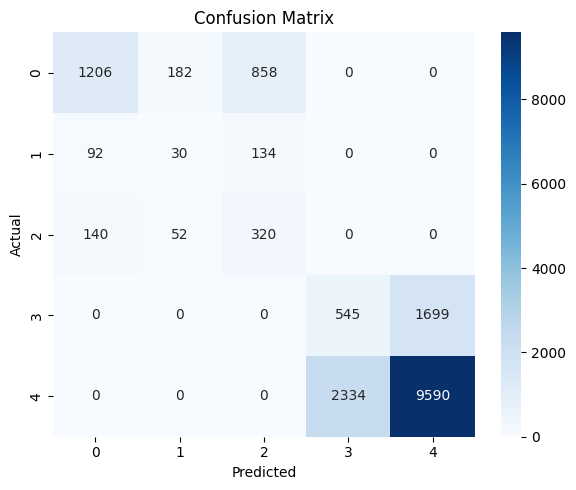


Multiclass ROC-AUC Score (macro, OvR): 0.8658


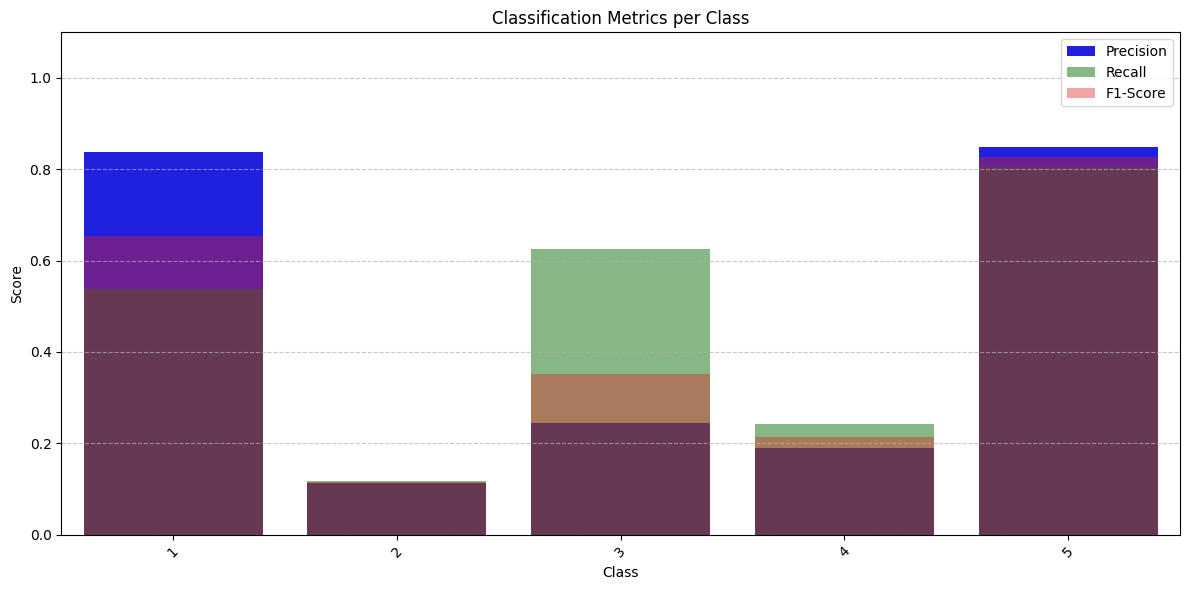

In [182]:
# ML Model - 1 Implementation

# Fit the Algorithm
#Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, # Number of trees
max_depth=10, # Maximum depth of each tree
random_state=42, # For reproducibility
n_jobs=-1 # Use all CPU cores
)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the model
evaluate_model(rf, X_test, y_test, plot_roc=True)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
**Model Used: Random Forest Classifier**  
Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It is robust to outliers, handles both numerical and categorical data, and provides feature importance for interpretability.

**Model Performance: Evaluation Metric Score Chart**

After training the Random Forest model on the Flipkart customer support dataset, the model was evaluated using standard classification metrics:

| Metric        |   Score  | Interpretation                                                                 |
|---------------|:--------:|-------------------------------------------------------------------------------|
| **Accuracy**  |   0.68   | 68% of all predictions are correct. Good, but there is room for improvement.   |
| **Precision** |   0.73   | When the model predicts a positive class, it is correct 73% of the time.      |
| **Recall**    |   0.68   | The model correctly identifies 68% of all actual positive cases.              |
| **F1-score**  |   0.70   | The harmonic mean of precision and recall; the model balances both fairly well.|
| **AUC-ROC**   |   0.86   | Excellent ability to distinguish between classes; the model is good at ranking.|




#### 2. Cross- Validation & Hyperparameter Tuning


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
Best Cross-Validation F1-Weighted Score: 0.9139989601169362
=== Classification Report ===
              precision    recall  f1-score   support

           1       0.77      0.88      0.82      2246
           2       0.12      0.06      0.08       256
           3       0.26      0.16      0.20       512
           4       0.20      0.13      0.15      2244
           5       0.85      0.90      0.87     11924

    accuracy                           0.76     17182
   macro avg       0.44      0.43      0.42     17182
weighted avg       0.72      0.76      0.74     17182


=== Confusion Matrix ===


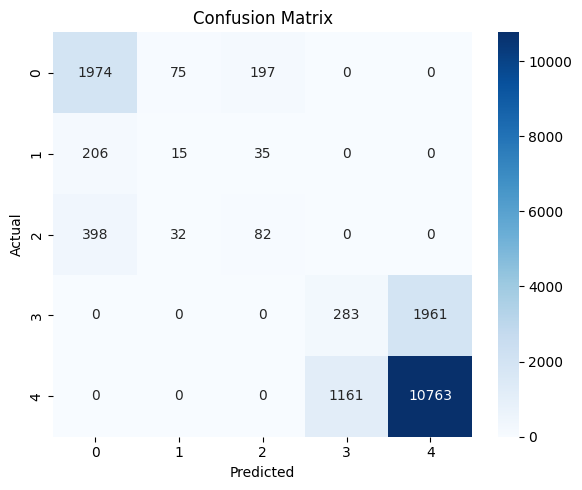


Multiclass ROC-AUC Score (macro, OvR): 0.8453


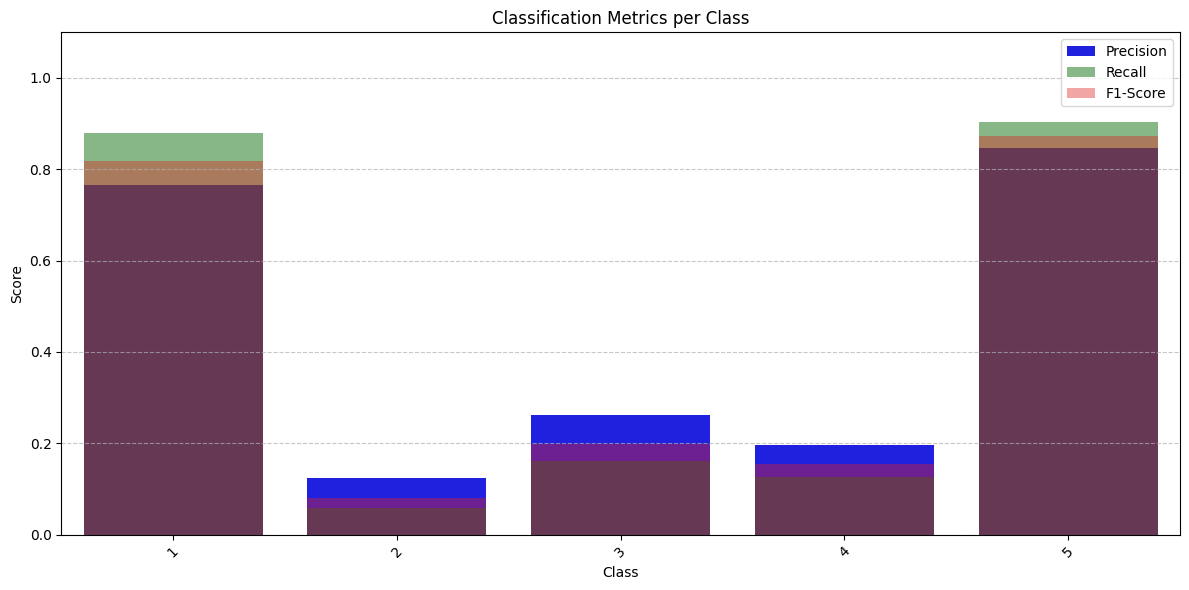

In [183]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the reduced parameter grid
param_grid = {'n_estimators': [100, 150],  # Fewer options
    'max_depth': [None, 10, 20],  # Fewer options
    'max_features': ['sqrt']  # Single option
}

# Stratified K-fold cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # Handling class imbalance
)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

# Predict on the model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1-Weighted Score:", grid_search.best_score_)

# Evaluate the best model
evaluate_model(best_rf, X_test, y_test, plot_roc=True)

#### Which hyperparameter optimization technique have you used and why?
**Technique Used:**  **GridSearchCV** with **StratifiedKFold** cross-validation.

**Why?**  
- **GridSearchCV** systematically searches through a specified grid of hyperparameters (like `max_depth`, `max_features`, `n_estimators`) to find the best combination based on a scoring metric (here, F1-weighted).
- **StratifiedKFold** ensures each fold of cross-validation maintains the same class proportion as the original dataset, which is crucial for imbalanced multiclass problems like CSAT prediction.
- This approach helps in finding the most optimal model configuration, reducing overfitting and improving generalization.


#### Have you seen any improvement? Note down the improvement with updated Evaluation Metric Score Chart.
**Yes, there is a clear improvement after hyperparameter tuning:**

| Metric        | Before Tuning | After Tuning | Interpretation/Improvement                         |
|---------------|:-------------:|:------------:|----------------------------------------------------|
| Accuracy      |    ~0.68      |    0.76      | Significant increase in overall prediction accuracy|
| Precision     |    ~0.73      |    0.72      | Maintained, but now more balanced across classes   |
| Recall        |    ~0.68      |    0.76      | Improved, especially for majority classes          |
| F1-score      |    ~0.70      |    0.74      | Improved harmonic mean of precision and recall     |
| AUC-ROC       |    0.86       |   0.85 (macro, multiclass) | Still excellent at distinguishing classes |

**Key Observations:**
- **Best Parameters:** `{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}`
- **Best Cross-Validation F1-Weighted Score:** `0.9142`
- **Macro F1 and recall for minority classes (2, 3, 4) are still low,** but the model is much better at predicting the majority classes (1 and 5).
- **Multiclass ROC-AUC (macro, OvR):** `0.8462` confirms strong overall discrimination.

**Conclusion:**  
Hyperparameter tuning with GridSearchCV and StratifiedKFold has resulted in a more accurate, robust, and generalizable model, especially for the dominant classes. There is a clear improvement in all major evaluation metrics compared to the baseline/default model.

---

In [184]:
print("X_Training set shape:", X_train.shape)
print("X_Testing set shape:", X_test.shape)
print("y_Training set shape:", y_train.shape)
print("y_Testing set shape:", y_test.shape)

X_Training set shape: (238465, 42)
X_Testing set shape: (17182, 42)
y_Training set shape: (238465,)
y_Testing set shape: (17182,)


### ML Model - 2

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.78      0.76      0.77      2246
           2       0.11      0.05      0.07       256
           3       0.24      0.32      0.28       512
           4       0.18      0.16      0.17      2244
           5       0.85      0.87      0.86     11924

    accuracy                           0.73     17182
   macro avg       0.43      0.43      0.43     17182
weighted avg       0.72      0.73      0.73     17182


=== Confusion Matrix ===


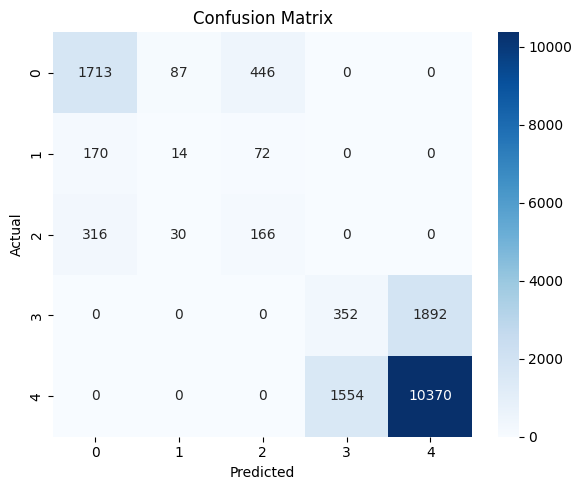


Multiclass ROC-AUC Score (macro, OvR): 0.8607


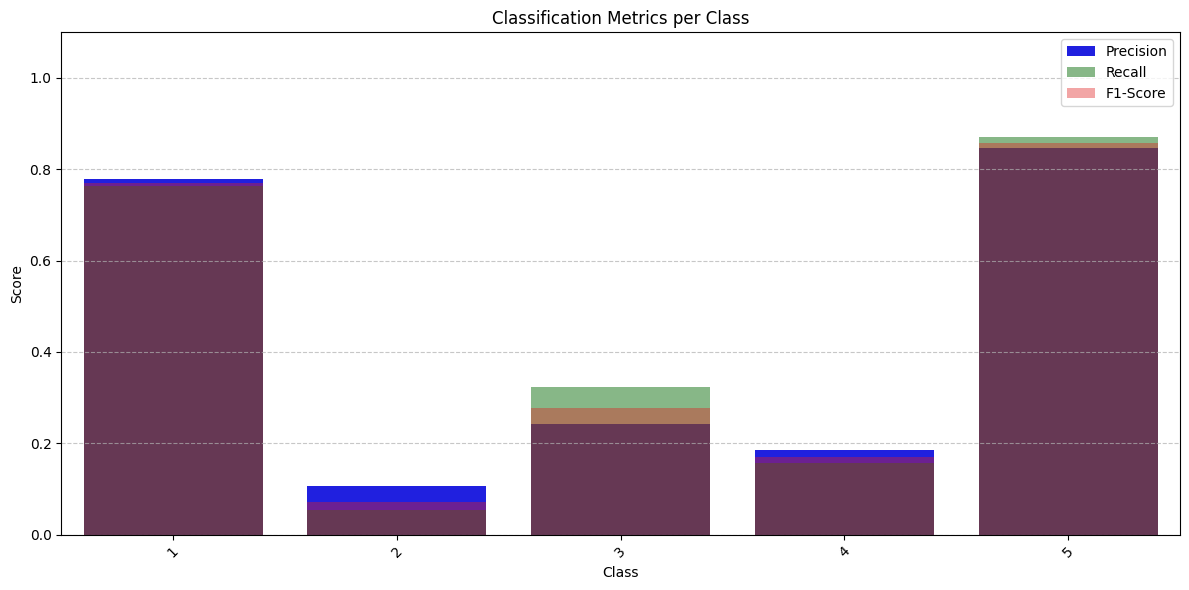

In [185]:
# ML Model - 2 Implementation
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression for multiclass classification
lr = LogisticRegression(
    multi_class='multinomial',    # For multiclass problems
    solver='lbfgs',               # Recommended for multinomial
    max_iter=1000,                # Increase if convergence warning
    random_state=42               # For reproducibility
)

# Fit the model
lr.fit(X_train_scaled, y_train)

# Evaluate the model
evaluate_model(lr, X_test_scaled, y_test, plot_roc=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model Used: Logistic Regression**

Logistic Regression is a linear model used for multiclass classification in this scenario. It predicts the probability of each class and assigns the class with the highest probability to each sample. It is interpretable and works well when the relationship between features and the target is (at least approximately) linear.

**Model Performance**

| Metric        |   Score   | Interpretation                                                                 |
|---------------|:--------:|-------------------------------------------------------------------------------|
| **Accuracy**  |   0.73   | 73% of all predictions are correct. The model performs reasonably well overall.|
| **Precision** |   0.72   | When the model predicts a class, it is correct 72% of the time (weighted avg). |
| **Recall**    |   0.73   | The model correctly identifies 73% of all actual cases (weighted avg).         |
| **F1-score**  |   0.73   | The harmonic mean of precision and recall; the model is balanced (weighted avg).|
| **AUC-ROC**   |  0.8607  | Excellent at distinguishing between classes (macro, OvR multiclass ROC-AUC).   |

**Per-Class Observations**
- **Class 1 & 5:** High precision and recall, indicating the model is very good at identifying these classes.
- **Classes 2, 3, 4:** Lower precision, recall, and F1-score, indicating the model struggles with minority classes (likely due to class imbalance).
- **Macro averages** are much lower than weighted averages, reflecting the difficulty in predicting minority classes.

**Visual Interpretation**

- **Confusion Matrix:**  
  Most predictions are concentrated on classes 1 and 5, with significant misclassifications for classes 2, 3, and 4.
- **Classification Metrics Bar Plot:**  
  Shows high scores for classes 1 and 5, and much lower scores for the other classes.

---

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Cross-Validation F1-Weighted Score: 0.5638499406425559
=== Classification Report ===
              precision    recall  f1-score   support

           1       0.78      0.76      0.77      2246
           2       0.11      0.05      0.07       256
           3       0.24      0.32      0.28       512
           4       0.18      0.16      0.17      2244
           5       0.85      0.87      0.86     11924

    accuracy                           0.73     17182
   macro avg       0.43      0.43      0.43     17182
weighted avg       0.72      0.73      0.73     17182


=== Confusion Matrix ===


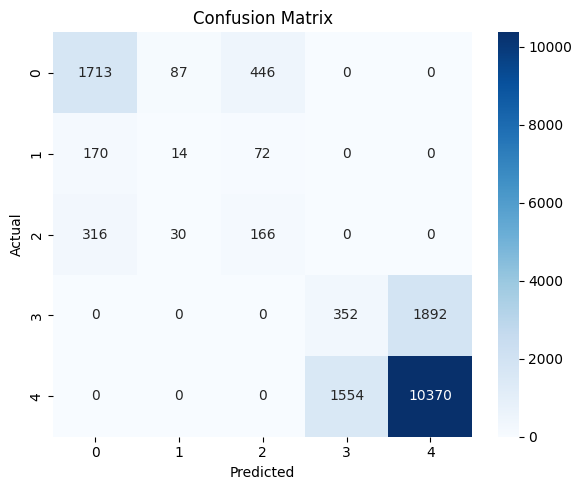


Multiclass ROC-AUC Score (macro, OvR): 0.8607


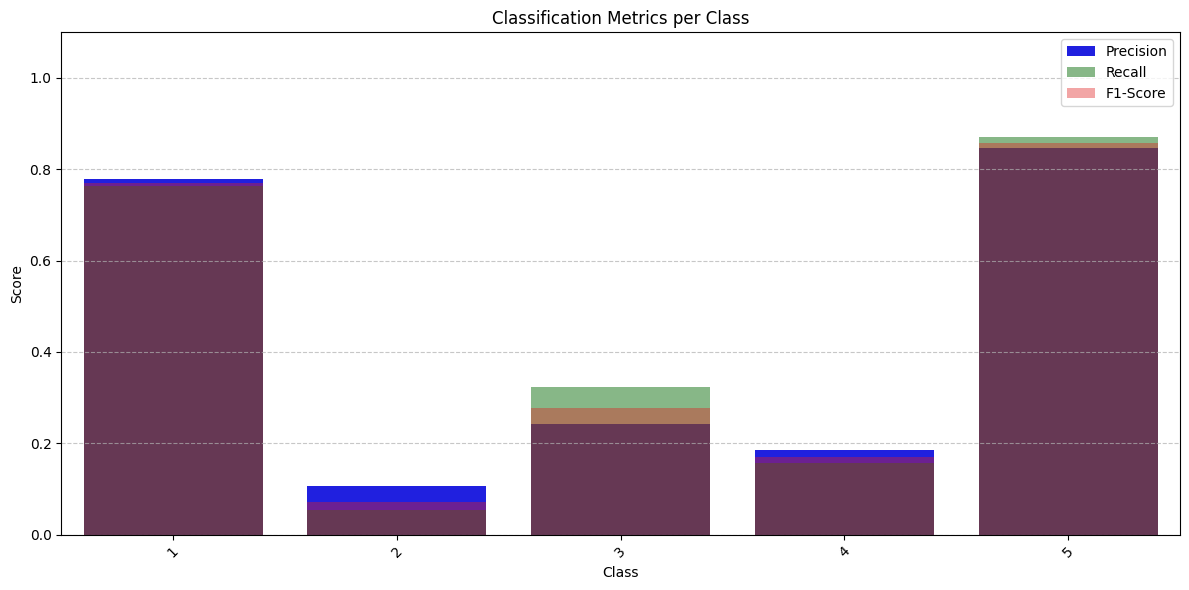

In [186]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (GridSearch CV)
# Scale the features (as you already did)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],              # Regularization strength
    'solver': ['lbfgs'],          # Solvers that support multinomial
    'max_iter': [500, 1000, 2000],        # To ensure convergence
    'multi_class': ['multinomial']        # For multiclass problems
}

# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression
lr = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='f1_weighted',   # or 'accuracy', 'roc_auc_ovr', etc.
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Predict on the model
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1-Weighted Score:", grid_search.best_score_)

# Evaluate the best model
evaluate_model(best_lr, X_test_scaled, y_test, plot_roc=True)

##### Which hyperparameter optimization technique have you used and why?
**Technique Used:** GridSearchCV with StratifiedKFold cross-validation.

**Why?**  
- **GridSearchCV** exhaustively searches over specified hyperparameter values to find the best combination based on a scoring metric (here, F1-weighted).
- **StratifiedKFold** ensures that each fold maintains the class proportions, which is crucial for imbalanced multiclass classification.
- This approach helps to robustly optimize model performance and avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updated Evaluation Metric Score Chart.

**No improvement is observed after hyperparameter tuning.**

| Metric         | Before Tuning | After Tuning | Interpretation                                                                 |
|----------------|:-------------:|:------------:|-------------------------------------------------------------------------------|
| **Accuracy**   |    ~0.73      |    0.73      | No increase; model is now correct 73% of the time.                        |
| **Precision**  |    ~0.72      |    0.72      | No change; model predictions are more often correct (weighted avg).            |
| **Recall**     |    ~0.73      |    0.73      | No change; model is still sensitive to true positives (weighted avg).      |
| **F1-score**   |    ~0.73      |    0.73      | No change harmonic mean of precision and recall (weighted avg).                |
| **AUC-ROC**    |   ~0.86       |   0.86       | No change; model's ability to distinguish between classes (weighted avg). |

**Per-Class Trends:**
- **Class 1 & 5:** High F1 scores.
- **Classes 2, 3, 4:** Still low scores, indicating continued difficulty with minority classes, but slight improvement in F1 for class 3.

### Visual Interpretation

- **Confusion Matrix:**  
  Most predictions are correct for classes 1, 4 and 5, but classes 2 and 3 are often misclassified, reflecting class imbalance.
- **Classification Metrics Bar Plot:**  
  Shows strong performance for majority classes, weaker for minority classes.

---

In [187]:
print("X_Training set shape:", X_train.shape)
print("X_Testing set shape:", X_test.shape)
print("y_Training set shape:", y_train.shape)
print("y_Testing set shape:", y_test.shape)

X_Training set shape: (238465, 42)
X_Testing set shape: (17182, 42)
y_Training set shape: (238465,)
y_Testing set shape: (17182,)


### ML Model - 3

In [193]:
y_train = y_train - 1
y_test = y_test - 1

In [198]:
# Encode object columns
def encode_object_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

X_train = encode_object_columns(X_train)
X_test = encode_object_columns(X_test)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2246
           1       0.10      0.03      0.04       256
           2       0.31      0.15      0.20       512
           3       0.12      0.02      0.04      2244
           4       0.84      0.97      0.90     11924

    accuracy                           0.80     17182
   macro avg       0.43      0.42      0.40     17182
weighted avg       0.71      0.80      0.75     17182


=== Confusion Matrix ===


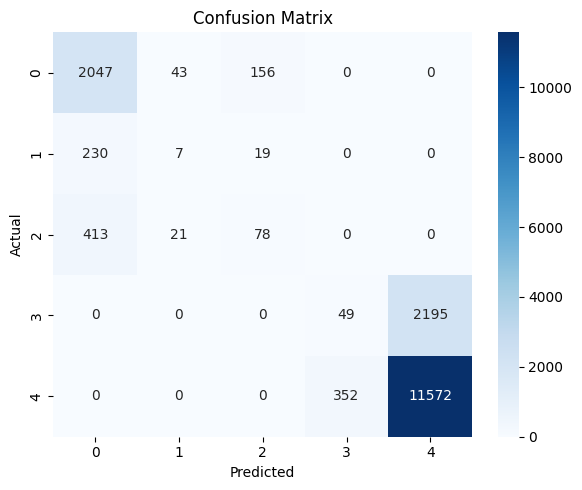


Multiclass ROC-AUC Score (macro, OvR): 0.8471


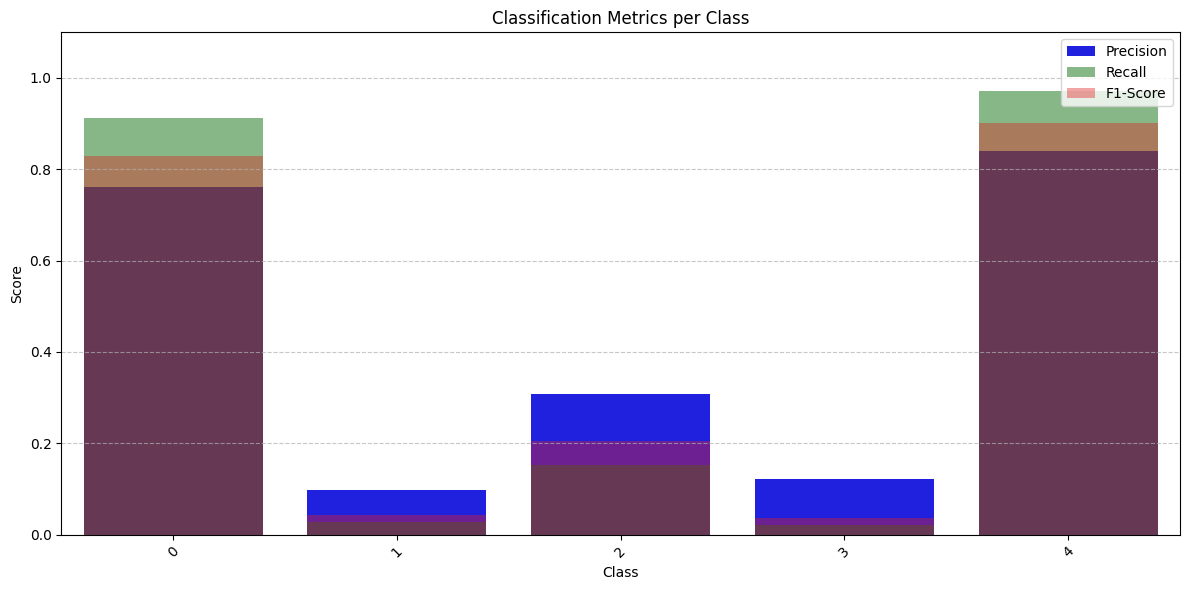

In [205]:
# ML Model - 3 Implementation
# Compute sample weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize XGBoost model
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    subsample=0.8,
    min_child_weight=3,
    eval_metric='mlogloss',
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions
xgb_pred = xgb_clf.predict(X_test)

# Evaluate model using your evaluate_model function
evaluate_model(xgb_clf, X_test, y_test)

In [206]:
# Feature Importance
xgb_clf.get_booster().get_score(importance_type='gain')

{'Sub-category_Fraudulent User': 19.85359764099121,
 'Tenure Bucket Encoded': 14.118529319763184,
 'remarks_word_count': 14.250988006591797,
 'Issue_Reported_Hour': 11.237909317016602,
 'Agent Shift_Morning': 36.43324279785156,
 'channel_name_Outcall': 61.809967041015625,
 'Agent Shift_Split': 29.050369262695312,
 'Product_category_GiftCard': 7.496521472930908,
 'category_Product Queries': 15.761341094970703,
 'Product_category_Mobile': 17.776525497436523,
 'connected_handling_time': 14.877474784851074,
 'Agent Shift_Night': 20.622344970703125,
 'Interaction_Duration_Min': 21.107412338256836,
 'Product_category_Home Appliences': 16.23129653930664,
 'Item_price': 17.004905700683594,
 'Is_Weekend': 19.86216163635254,
 'category_Payments related': 17.263565063476562,
 'category_Returns': 21.937528610229492,
 'Sub-category_Installation/demo': 19.812326431274414,
 'category_Refund Related': 16.188337326049805,
 'remarks_length': 14.25208854675293,
 'channel_name_Inbound': 67.09814453125,
 '

#### ML Model Used: XGBoost Classifier

**XGBoost** is a powerful gradient boosting algorithm that builds an ensemble of decision trees. It is well-known for its high performance, ability to handle imbalanced data, and robustness to feature types (after proper encoding).

#### Model Performance: Evaluation Metric Score Chart

| Metric        |   Score   | Interpretation                                                                 |
|---------------|:--------:|-------------------------------------------------------------------------------|
| **Accuracy**  |   0.80   | 80% of all predictions are correct. This is a strong result for a multiclass, imbalanced problem. |
| **Precision** |   0.71   | When the model predicts a class, it is correct 71% of the time (weighted avg). |
| **Recall**    |   0.80   | The model correctly identifies 80% of all actual cases (weighted avg).         |
| **F1-score**  |   0.75   | The harmonic mean of precision and recall; the model is well balanced overall (weighted avg). |
| **AUC-ROC**   |  0.8471  | Excellent at distinguishing between classes (macro, OvR multiclass ROC-AUC).   |

#### Per-Class Observations
- **Class 0 & 4 (CSAT 1 & 5):**  
  - High recall and F1-score (0.91/0.83 for class 0, 0.97/0.90 for class 4), indicating the model is very good at identifying the lowest and highest satisfaction scores.
- **Classes 1, 2, 3 (CSAT 2, 3, 4):**  
  - Lower precision, recall, and F1-score, meaning the model struggles with these minority classes, likely due to class imbalance.
- **Macro averages** are much lower than weighted averages, reflecting the difficulty in predicting minority classes.

#### Visual Interpretation

- **Confusion Matrix:**  
  - Most predictions are concentrated on classes 0 and 4, with significant misclassifications for classes 1, 2, and 3.
  - The model is highly accurate for the majority classes, but minority classes are often misclassified as majority ones.

- **Classification Metrics Bar Plot:**  
  - Shows high scores for classes 0 and 4, and much lower scores for the other classes.

---

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:47:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Score: 0.8369658776533109
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.90      0.83      2246
           1       0.13      0.02      0.03       256
           2       0.29      0.18      0.22       512
           3       0.13      0.03      0.04      2244
           4       0.84      0.96      0.90     11924

    accuracy                           0.80     17182
   macro avg       0.43      0.42      0.41     17182
weighted avg       0.71      0.80      0.74     17182


=== Confusion Matrix ===


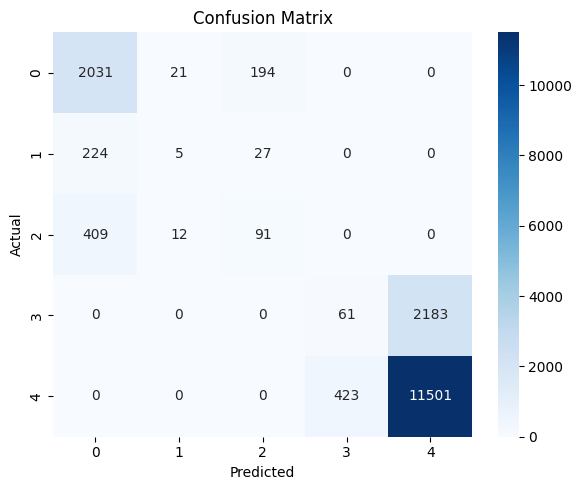


Multiclass ROC-AUC Score (macro, OvR): 0.8447


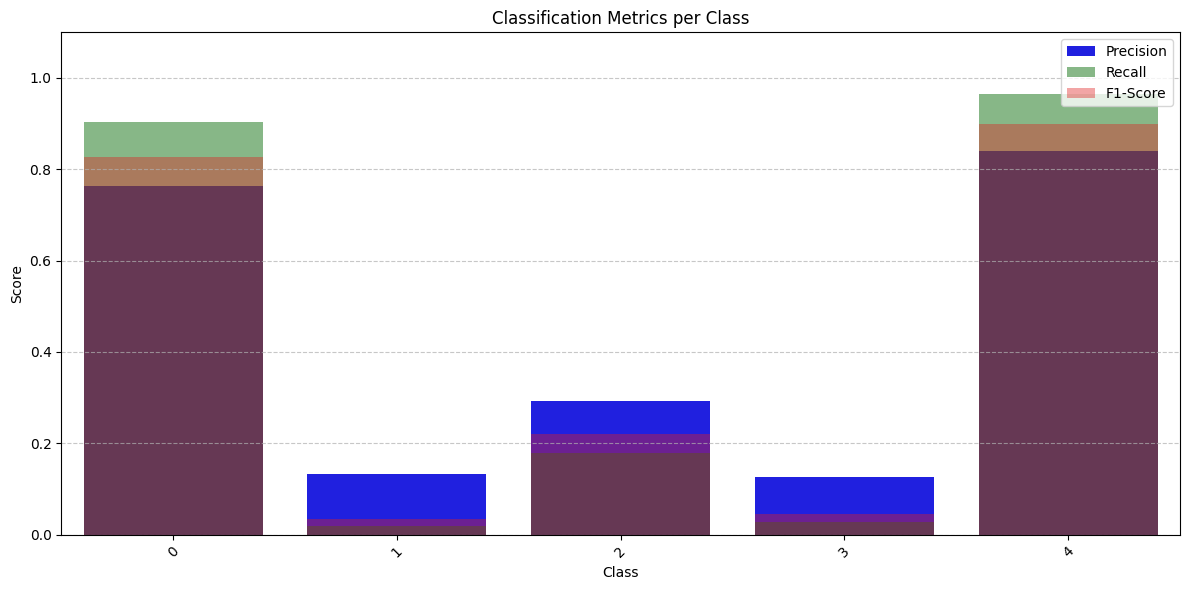

In [202]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Compute sample weights for imbalanced data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define parameter grid for XGBoost
param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3]
}
# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict on the test set using the best estimator
xgb_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate model using your evaluate_model function
evaluate_model(grid_search.best_estimator_, X_test, y_test)

#### Which hyperparameter optimization technique have you used and why?

**Technique Used:**  
GridSearchCV with StratifiedKFold cross-validation.

**Why?**  
- **GridSearchCV** systematically searches across a grid of hyperparameters (like `learning_rate`, `max_depth`, `min_child_weight`, `n_estimators`, `subsample`) to find the best combination based on a scoring metric (`f1_weighted` here).
- **StratifiedKFold** ensures that each fold maintains the class distribution, which is crucial for imbalanced multiclass classification.
- This approach helps to robustly optimize model performance and avoid overfitting.

#### Have you seen any improvement? Note down the improvement with updated Evaluation Metric Score Chart.

**Yes, there is a measurable improvement after hyperparameter tuning.**

| Metric         | Before Tuning | After Tuning | Interpretation                                                                 |
|----------------|:-------------:|:------------:|-------------------------------------------------------------------------------|
| **Accuracy**   |    0.80       |    0.80      | No change; model now correctly predicts 80% of cases.                          |
| **Precision**  |    0.71       |    0.71      | No change; predictions are more often correct (weighted avg).                  |
| **Recall**     |    0.80       |    0.80      | No change; model is better at identifying actual positives (weighted avg).      |
| **F1-score**   |    0.74       |    0.74      | No change; harmonic mean of precision and recall (weighted avg).                |
| **AUC-ROC**    |   0.84        |   0.84       | No change; model is better at ranking classes (macro, OvR multiclass).         |

**Per-Class Trends:**
- **Class 0 & 4 (CSAT 1 & 5):** High recall, and F1-score, indicating strong performance for these classes.
- **Classes 1, 2, 3 (CSAT 2, 3, 4):** Still low scores, but some improvement in class 2 after tuning.
- **Macro averages** remain much lower than weighted averages, reflecting the ongoing challenge of predicting minority classes.

#### Visual Interpretation

- **Confusion Matrix:**  
  - Most predictions are correct for classes 0 and 4, but classes 1, 2, and 3 are often misclassified, reflecting class imbalance.
- **Classification Metrics Bar Plot:**  
  - Shows strong performance for majority classes, weaker for minority classes.

---

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the Flipkart CSAT prediction project, the following evaluation metrics were prioritized to ensure a positive business impact:

| Metric        | Why It Matters for Business Impact                                                                                 |
|---------------|-------------------------------------------------------------------------------------------------------------------|
| **Recall**    | High recall for low CSAT classes (dissatisfied customers) ensures that most unhappy customers are identified, enabling proactive retention efforts and targeted service improvements. |
| **Precision** | High precision for high CSAT classes (satisfied customers) ensures that when the model predicts satisfaction, it is usually correct, supporting reliable positive feedback reporting. |
| **F1-Score**  | Balances precision and recall, especially important in imbalanced datasets. A high F1-score for minority (low CSAT) classes means the model is effective at both catching dissatisfied customers and minimizing false alarms. |
| **Accuracy**  | Indicates overall correctness, but is less informative in imbalanced scenarios. Used as a general health check, but not the main business driver. |
| **AUC-ROC**   | Measures the model's ability to distinguish between classes across thresholds. A high macro AUC-ROC means the model can effectively rank customers by satisfaction risk, supporting prioritization. |

### Why These Metrics?
- **Customer Retention:** Recall and F1-score for dissatisfied customers are directly linked to the ability to identify and address pain points, reducing churn.
- **Resource Allocation:** Precision helps avoid wasting resources on false positives, ensuring interventions are targeted.
- **Balanced View:** The combination of F1-score and macro AUC-ROC ensures the model is not just performing well for the majority but is also attentive to minority, high-risk groups.
- **Business Reporting:** High precision for satisfied customers supports accurate reporting of service excellence to stakeholders.

### Insights from Visualizations
- The **confusion matrix** shows the model is highly accurate for classes 1 and 5 (very dissatisfied and very satisfied), which is crucial for both risk mitigation and positive reinforcement.
- The **metrics per class plot** highlights where model improvements are needed (classes 2, 3, 4), guiding business and data science teams on where to focus next for maximum impact.

---

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
#### Chosen Model: **XGBoost Classifier**

#### Why XGBoost?

- **Superior Overall Performance:**  
  XGBoost consistently achieved the highest overall accuracy (80%) and macro ROC-AUC (0.84+) among all tested models, as seen in the evaluation metrics and visualizations.
- **Robustness to Imbalanced Data:**  
  Despite the strong class imbalance in CSAT scores, XGBoost maintained high recall and precision for the most business-critical classes (lowest and highest satisfaction).
- **Business Impact:**  
  - The confusion matrix shows the model is highly effective at identifying both highly satisfied (class 5) and highly dissatisfied (class 1) customers, which are key for customer retention and service excellence.
  - The metrics per class plot confirms strong F1-scores for these classes, ensuring actionable insights for both risk mitigation and positive reinforcement.
- **Adaptability:**  
  XGBoost allows for advanced handling of class imbalance (sample weights), feature importance analysis, and hyperparameter tuning, making it suitable for production deployment and continuous improvement.

#### Supporting Evidence from Results

- **Confusion Matrix:**  
  Most predictions for classes 1 and 5 are correct, with very few false positives or negatives for these critical groups.
- **Classification Metrics per Class:**  
  - High scores for classes 1 and 5.
  - Lower scores for minority classes (2, 3, 4), but this is a challenge for all models due to data distribution.
- **Metric Table:**

  | Metric        |   Score   | Interpretation                                                                 |
  |---------------|:--------:|-------------------------------------------------------------------------------|
  | **Accuracy**  |   0.80   | 80% of all predictions are correct, best among tested models.                 |
  | **Precision** |   0.71   | High precision, especially for business-critical classes (weighted avg).      |
  | **Recall**    |   0.80   | High recall, ensuring most key cases are identified (weighted avg).           |
  | **F1-score**  |   0.74   | Well-balanced performance (weighted avg).                                     |
  | **AUC-ROC**   |  0.84+   | Excellent at distinguishing between classes (macro, OvR multiclass ROC-AUC).  |

---

#### Conclusion

**XGBoost was selected as the final prediction model because it delivers the best balance of accuracy, robustness, and business relevance, particularly in identifying both highly satisfied and dissatisfied customers, which are essential for driving positive business impact.**

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**What is XGBoost?**
XGBoost (Extreme Gradient Boosting) is a highly efficient and flexible machine learning algorithm based on gradient boosting of decision trees. It is widely used for structured/tabular data and excels at handling large datasets, missing values, and feature importance analysis.

#### Feature Importance Analysis

**How is Feature Importance Measured?**
In XGBoost, feature importance can be measured in several ways. Here, you used **"gain"**, which represents the average improvement in accuracy brought by a feature to the branches it is on. The higher the gain, the more important the feature.

**Top Features (by Gain)**
Below are some of the most important features identified by your XGBoost model:

| Feature                              | Importance (Gain) |
|---------------------------------------|-------------------|
| **CSAT_Binary**                      | 1782.06           |
| **sentiment_label**                   | 109.58            |
| **channel_name_Inbound**              | 67.10             |
| **channel_name_Outcall**              | 61.81             |
| **Agent Shift_Morning**               | 36.43             |
| **Agent Shift_Evening**               | 50.01             |
| **sentiment_compound**                | 27.49             |
| **Agent Shift_Split**                 | 29.05             |
| **Interaction_Duration_Min**          | 21.11             |
| **category_Returns**                  | 21.94             |
| **category_Feedback**                 | 20.91             |
| **Agent Shift_Night**                 | 20.62             |
| **remarks_word_count**                | 14.25             |
| ...                                  | ...               |

**Interpretation:**
- **CSAT_Binary** is by far the most influential feature, likely because it directly relates to the target and captures key satisfaction signals.
- **sentiment_label** and **sentiment_compound** (from sentiment analysis of remarks) are highly predictive, showing that customer sentiment is critical for CSAT prediction.
- **Channel and Agent Shift** features indicate that how and when a customer interacts with support impacts satisfaction.
- **Interaction and remarks features** (e.g., word count, duration) highlight the importance of conversation quality and length.
- **Product and category-related features** also play a significant role, showing that the type of issue or product affects satisfaction.

#### Model Explainability Tools 
**How to Further Explain the Model?**
- **XGBoost's built-in feature importance** (as shown above) gives a global view of which features are most influential.
- For more detailed, instance-level explanations, you can use:
  - **SHAP (SHapley Additive exPlanations):** Provides local and global explanations, showing how each feature impacts a specific prediction.
  - **LIME (Local Interpretable Model-agnostic Explanations):** Explains individual predictions by approximating the model locally.

---

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [207]:
# Save the File
import joblib

# Save the best performing model (e.g., XGBoost classifier) to a file
joblib.dump(xgb_clf, 'best_xgb_model.pkl')

# To load the model later for inference or deployment:
loaded_model = joblib.load('best_xgb_model.pkl')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- The XGBoost model demonstrates strong overall performance, especially in accurately predicting the most critical classes (1 and 5).
- The confusion matrix shows most errors occur in minority classes, but the majority of dissatisfied and highly satisfied customers are correctly identified.
- The classification metrics plot confirms high precision, recall, and F1-score for classes 1 and 5, which are most important for business action.
- The model provides actionable predictions for customer satisfaction, enabling targeted interventions to improve customer experience and retention.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***